Universidad del Valle de Guatemala <br>
20/03/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 5
## Redes Bayesianas

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import math
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [2]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
entrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
prueba = pd.read_csv('test.csv', encoding='unicode_escape')
prueba.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2) Preprocesamiento de los datos.

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [4]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)


Eliminar filas que contengan datos nulos (NaN).

In [5]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)


## Resumen estadístico de las variables

In [6]:
    entrenamiento.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


In [7]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in entrenamiento.columns:
    entrenamiento[col] = normalizer(entrenamiento[col])

### Analisis de Datos

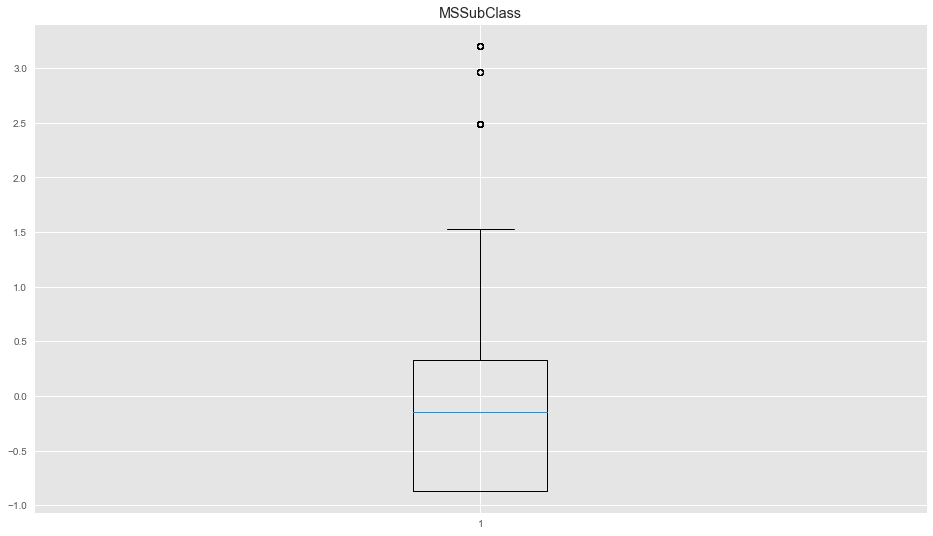

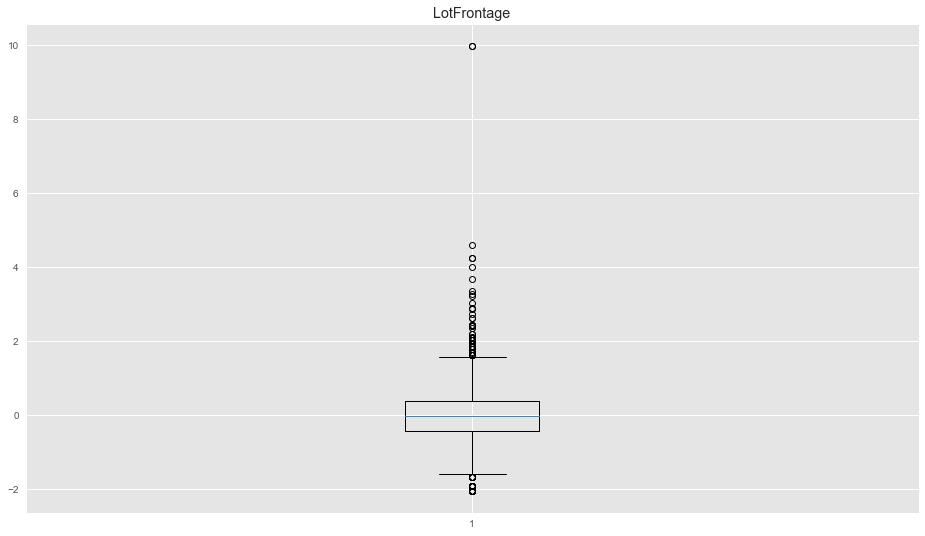

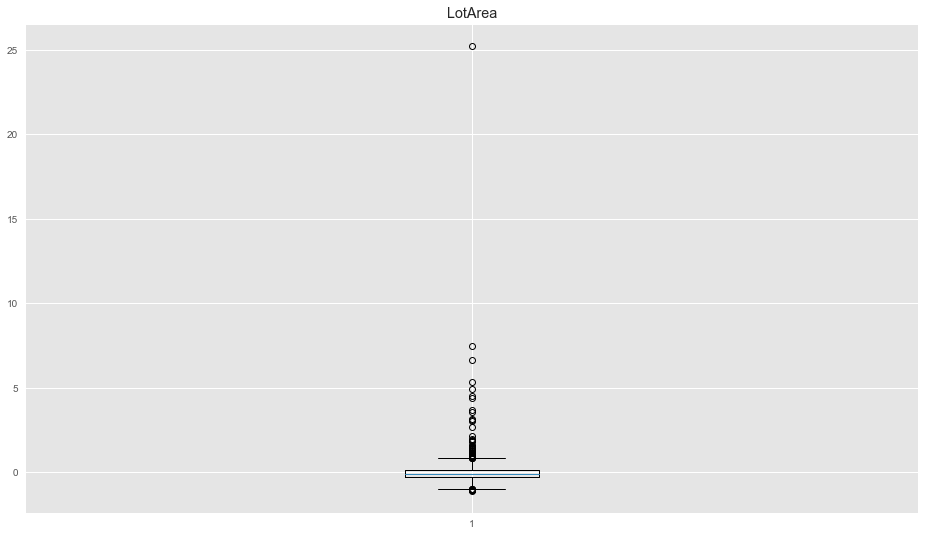

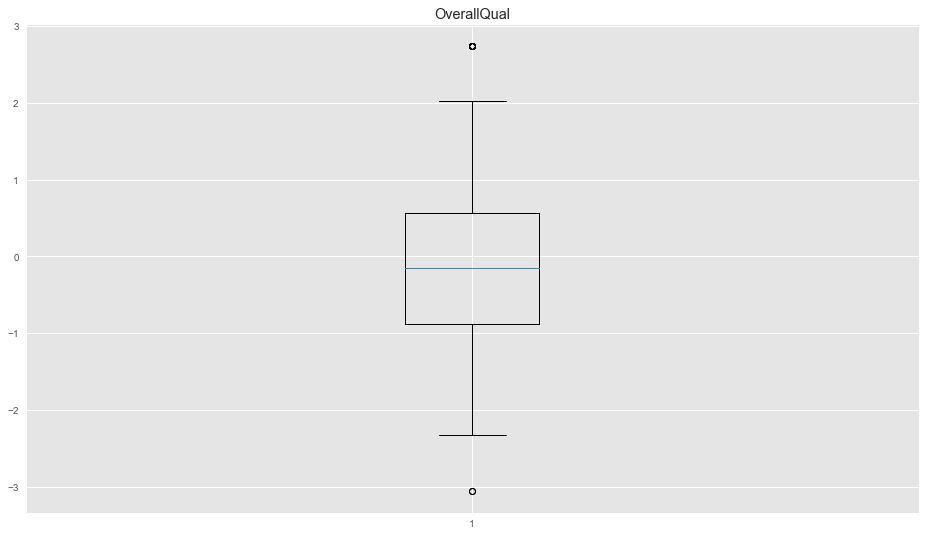

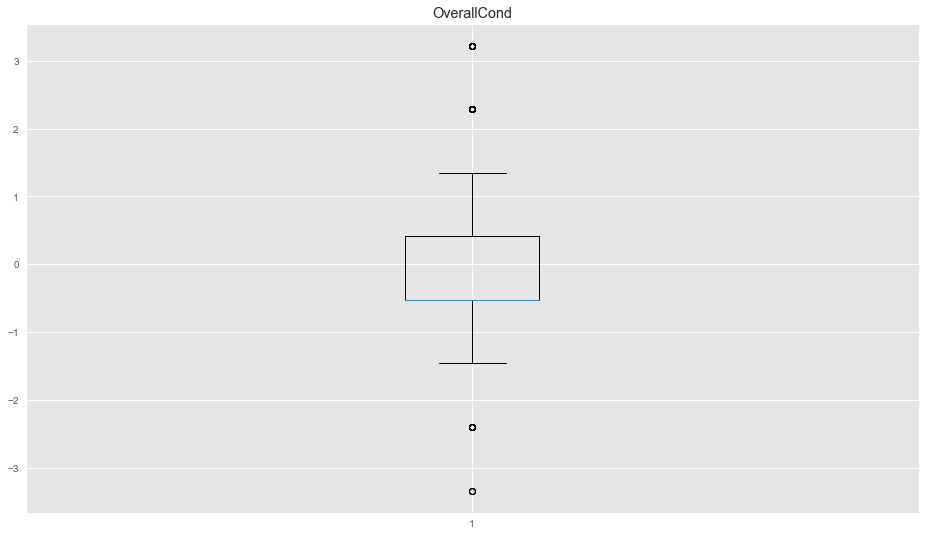

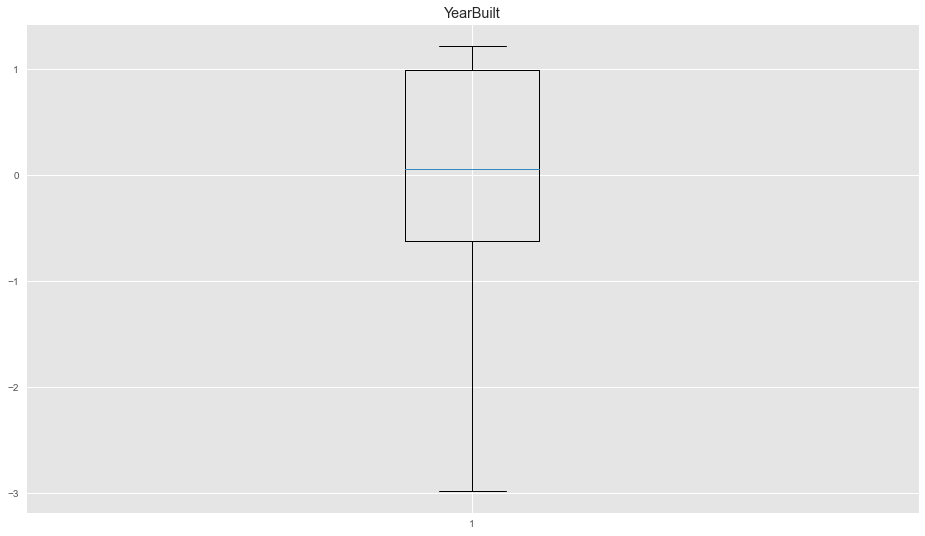

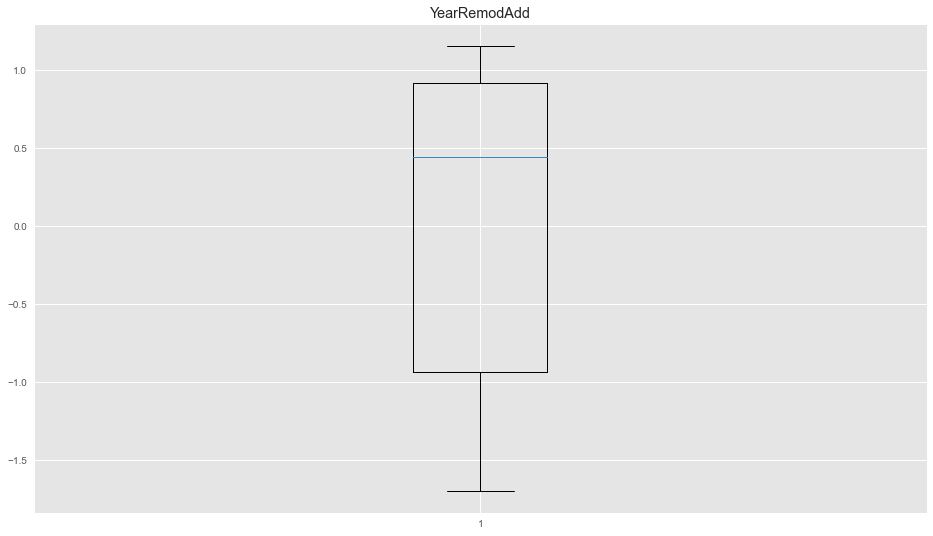

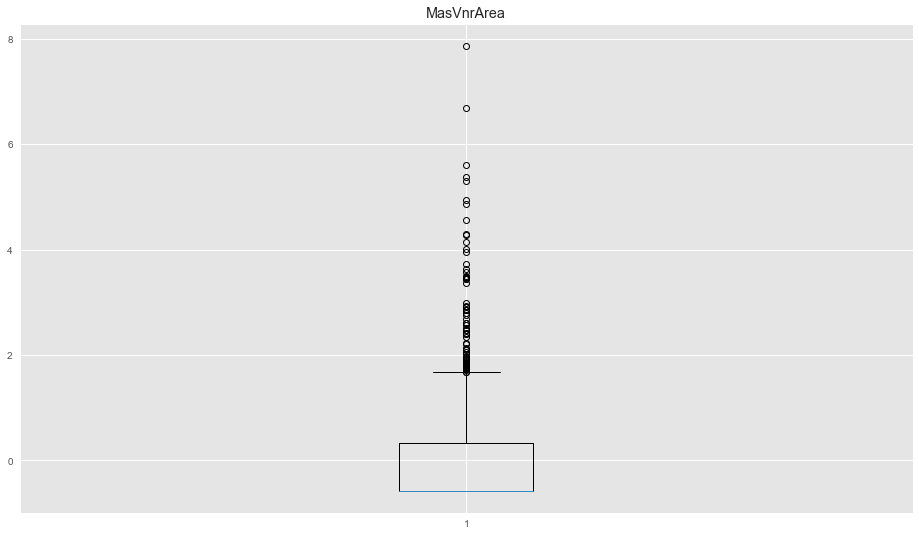

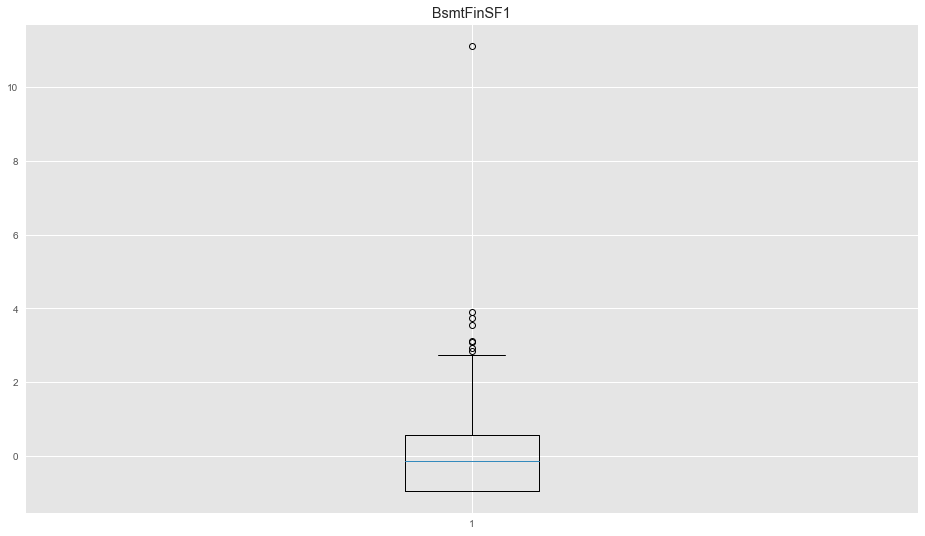

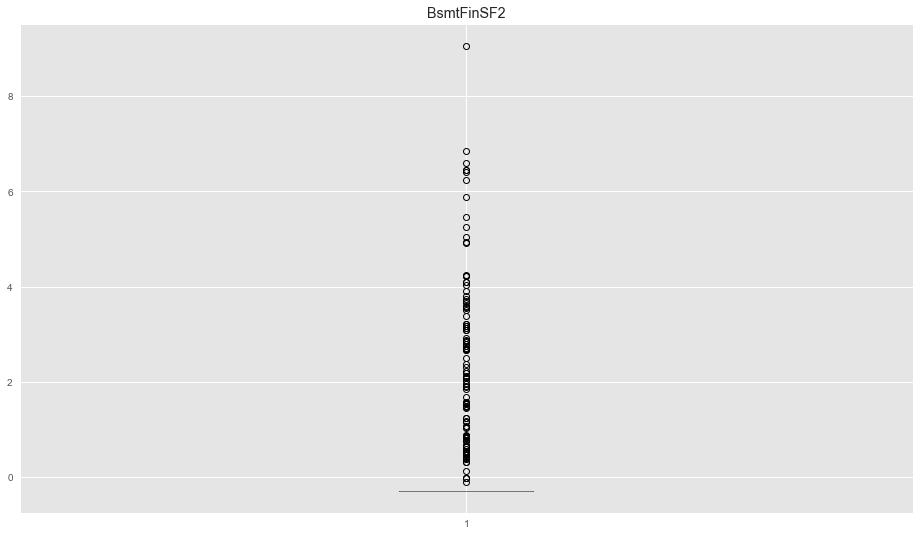

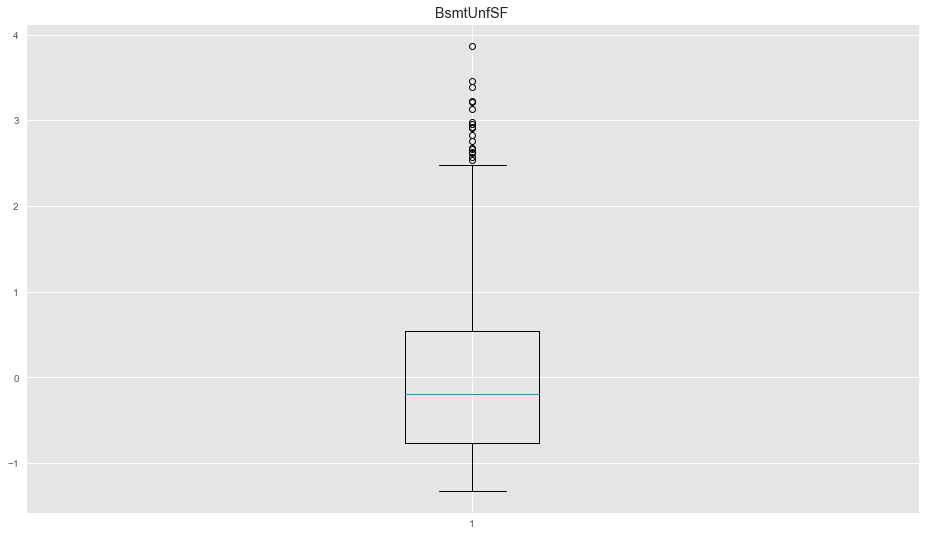

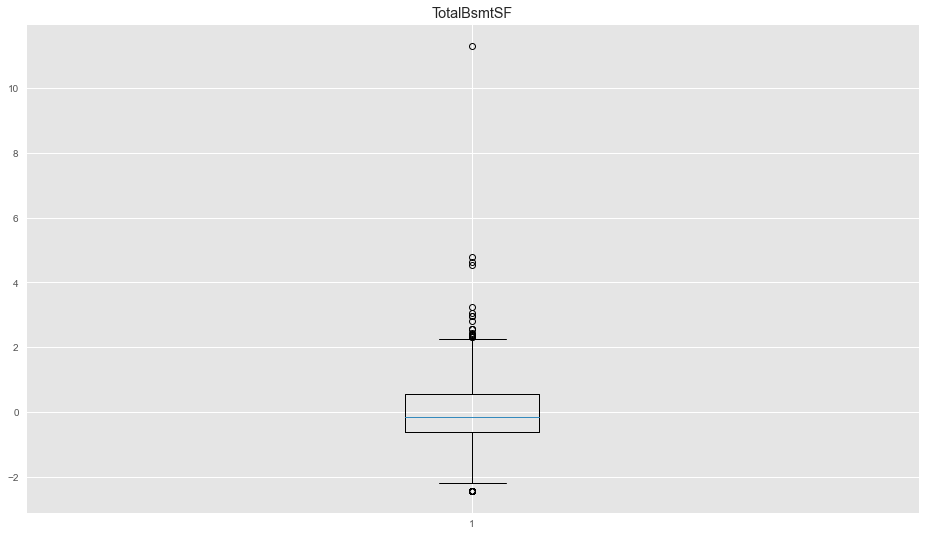

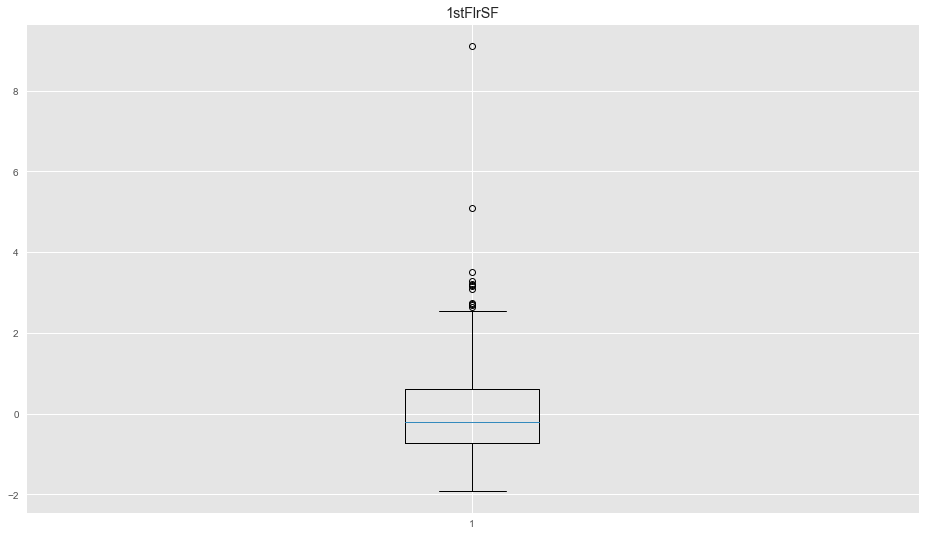

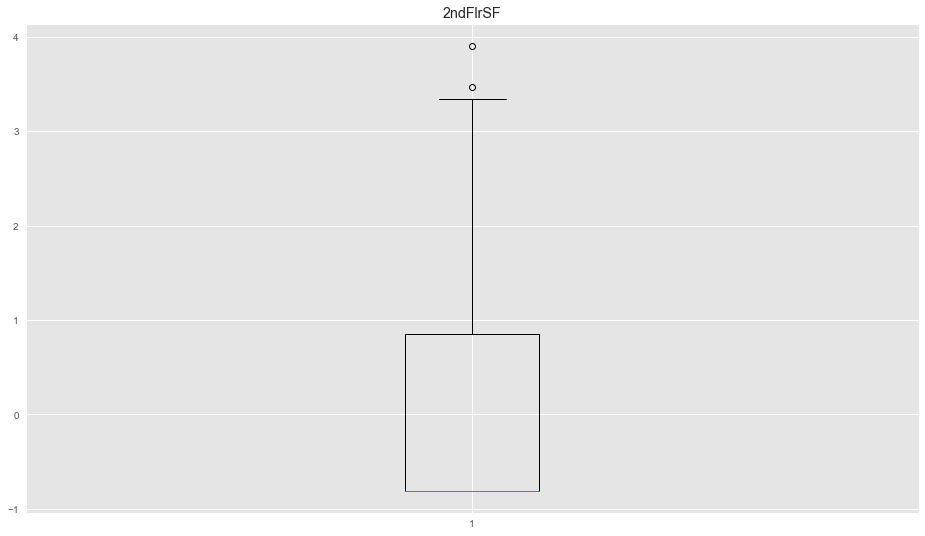

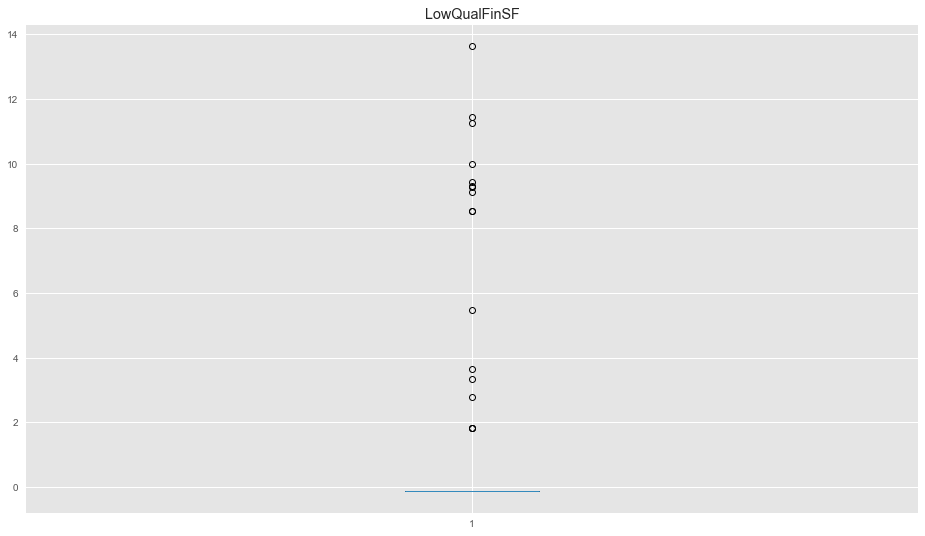

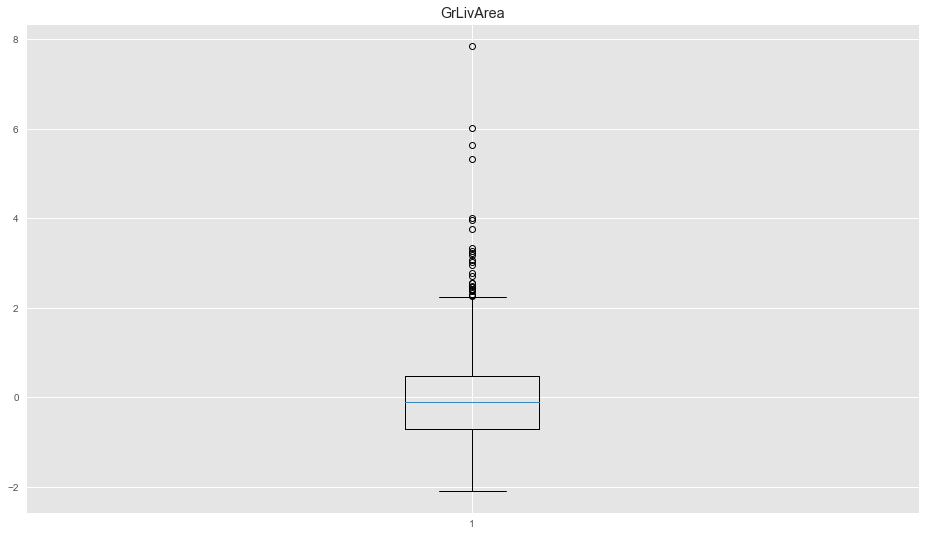

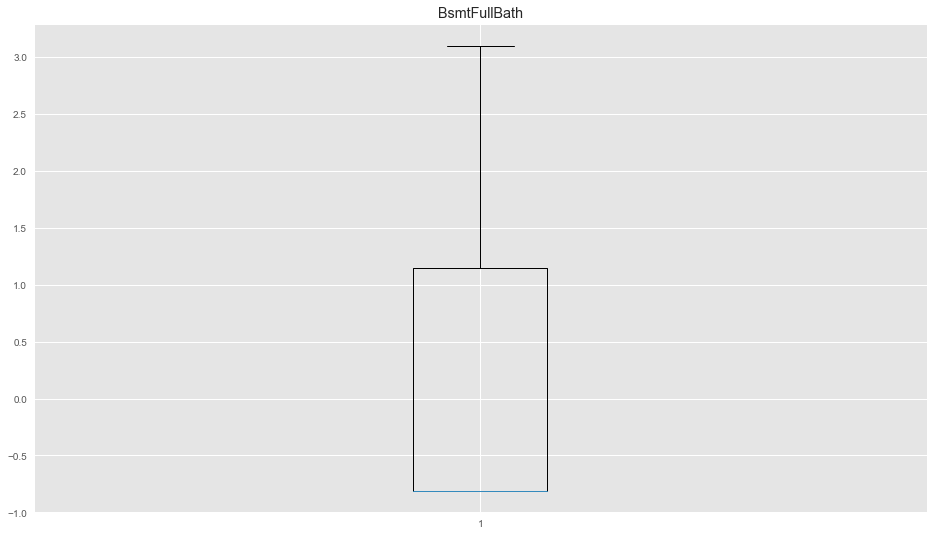

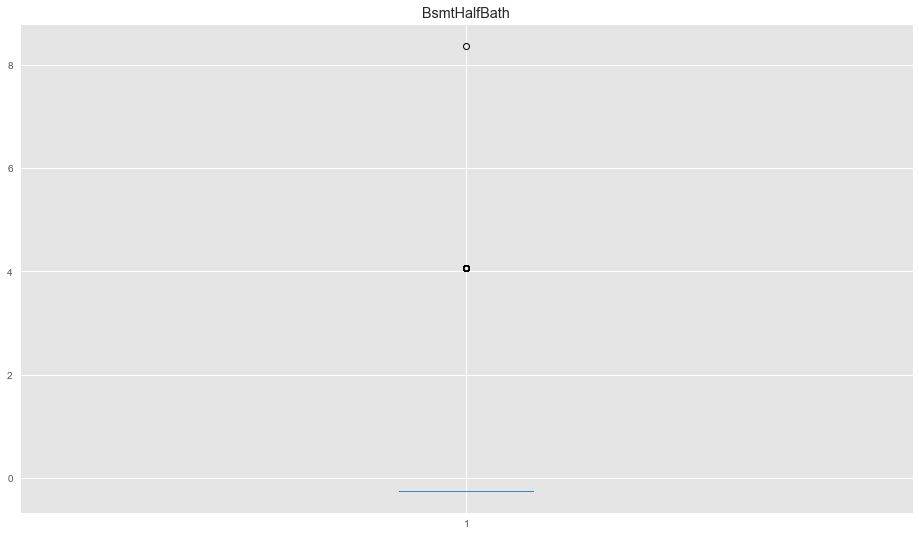

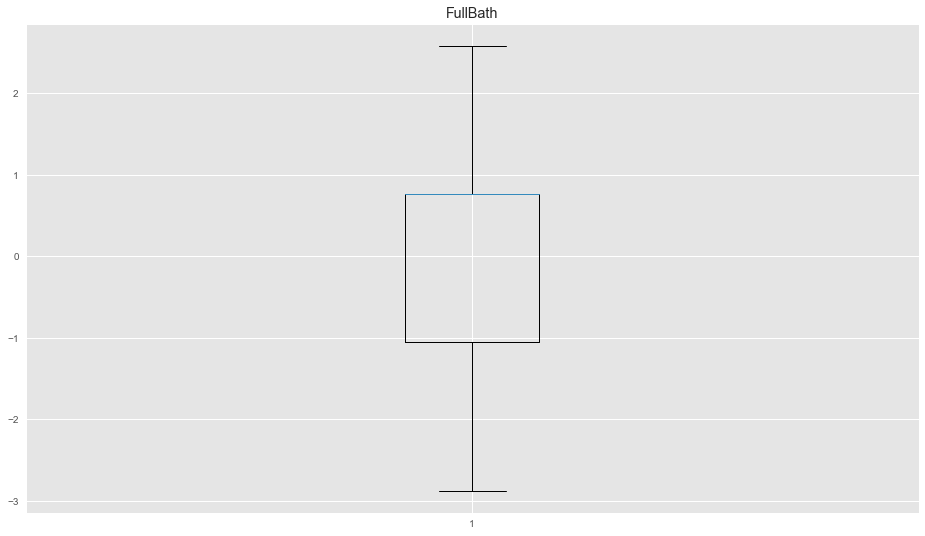

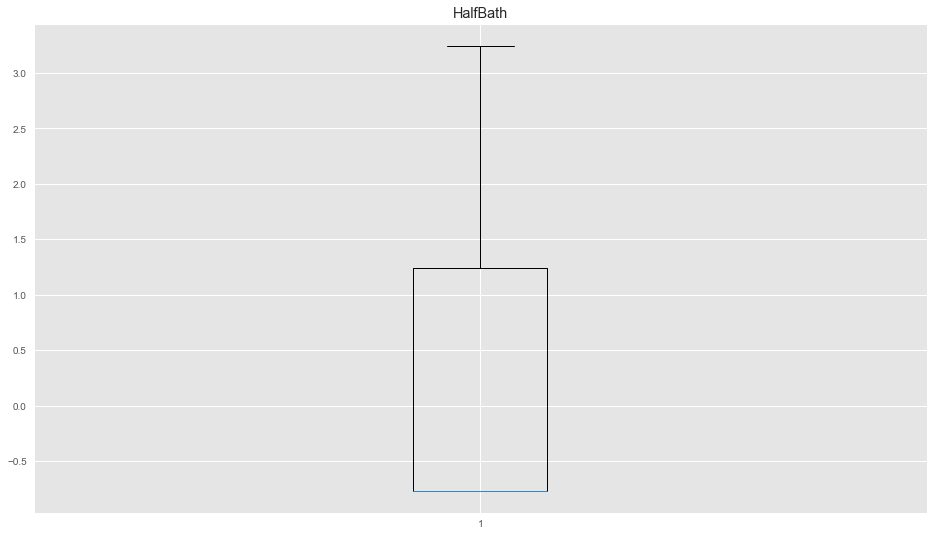

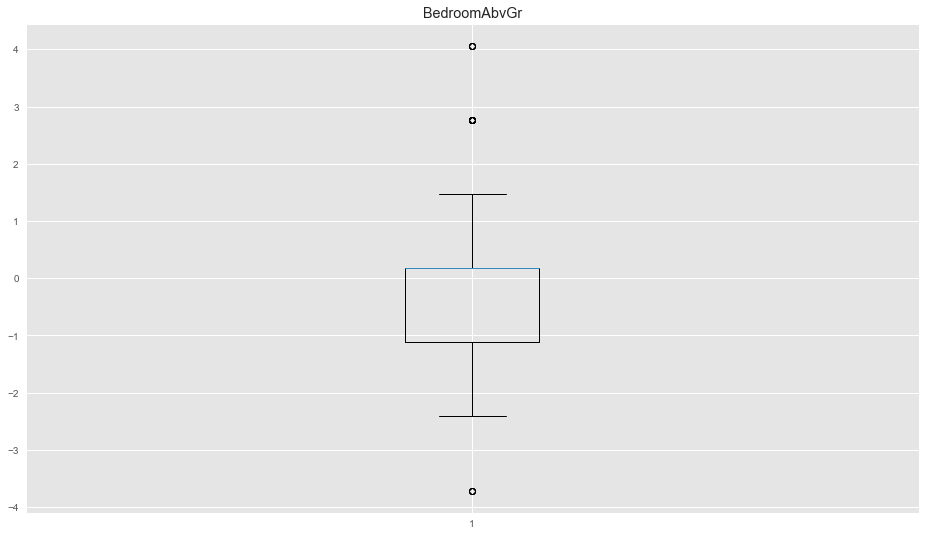

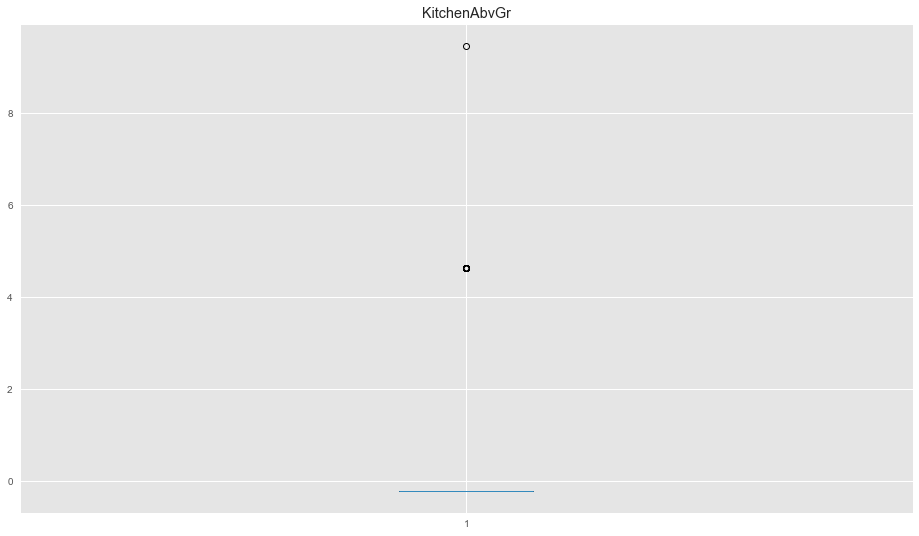

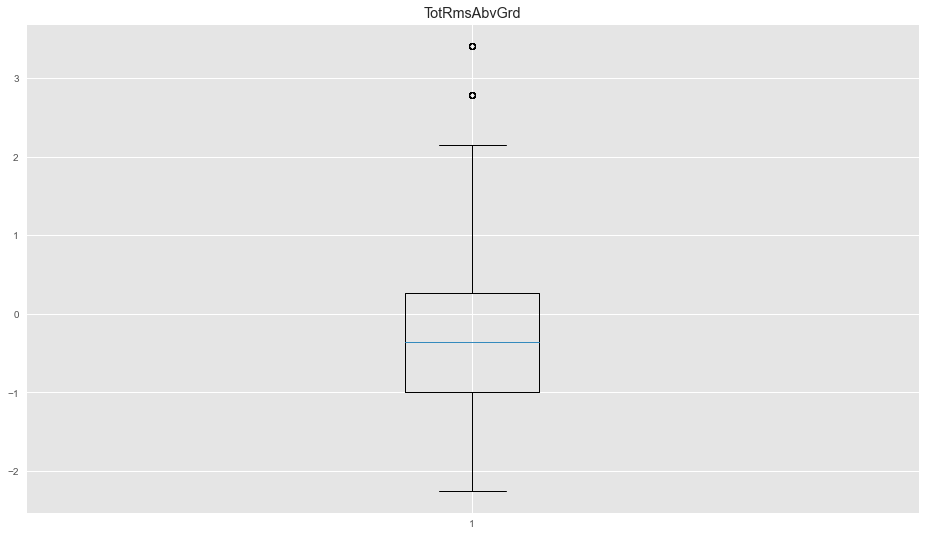

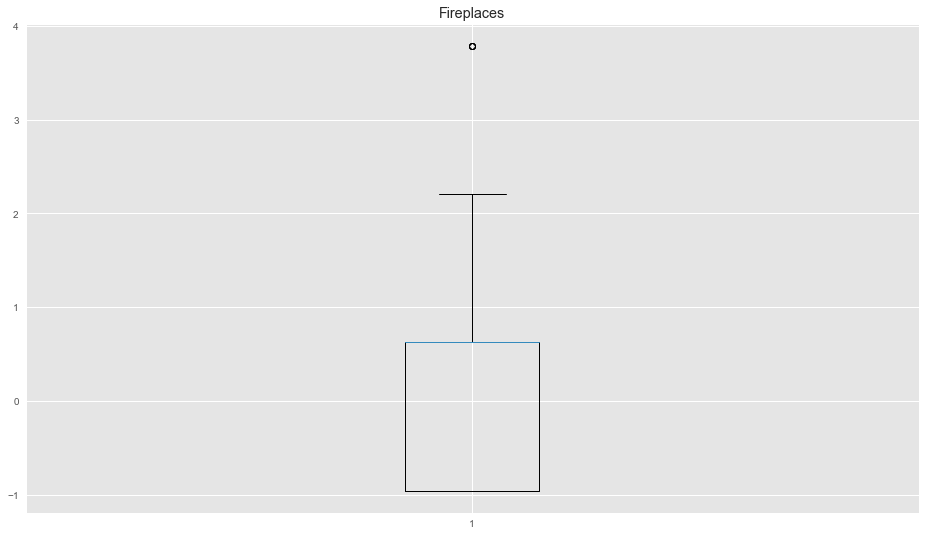

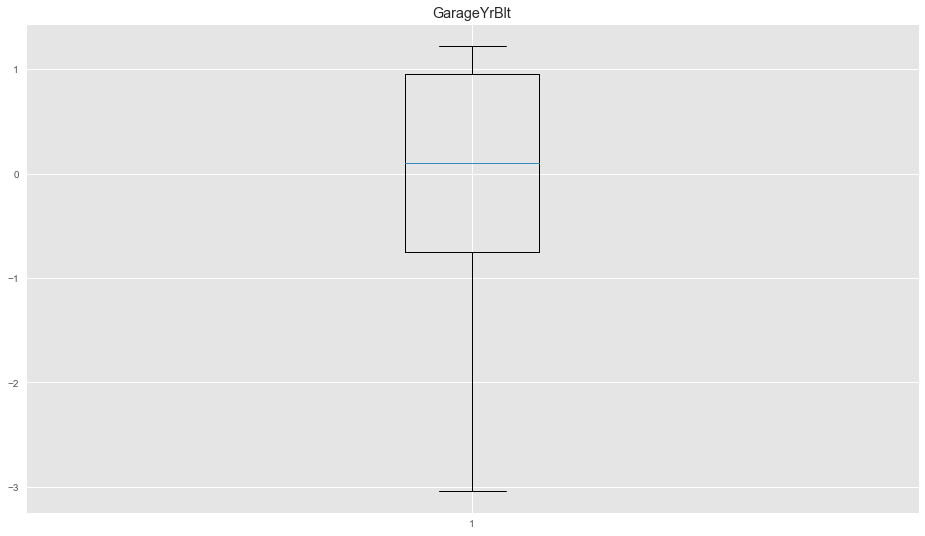

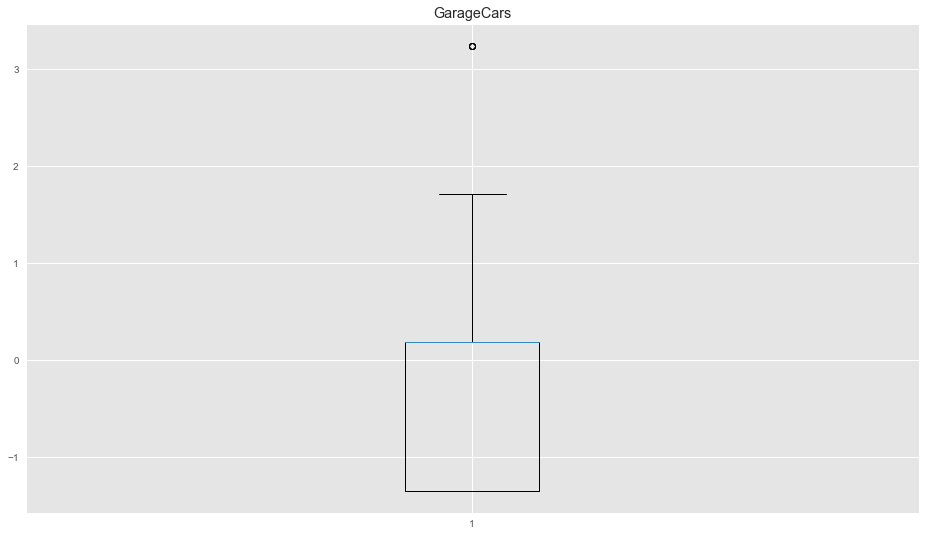

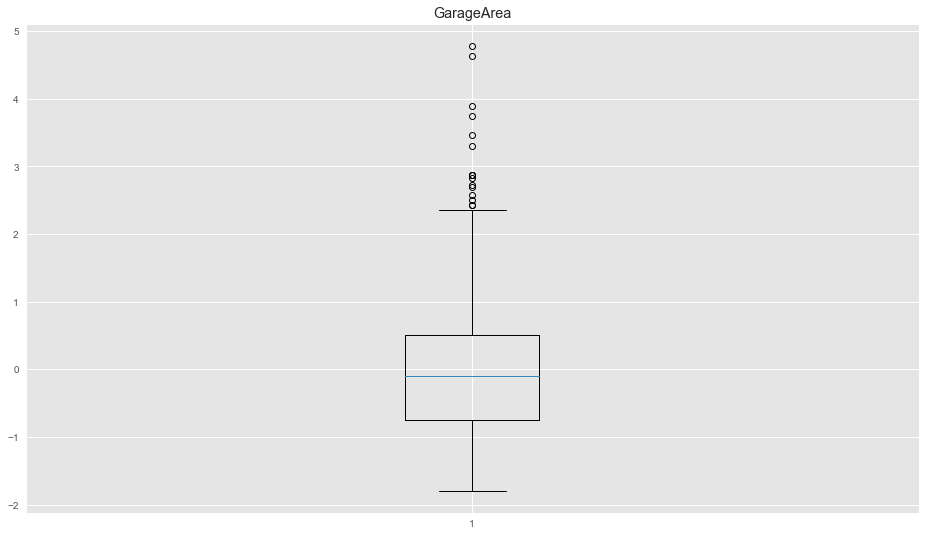

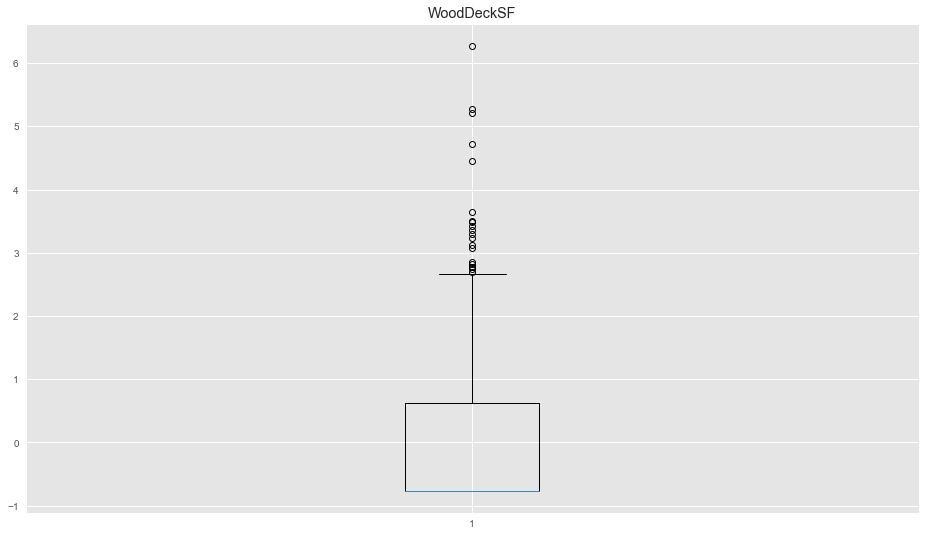

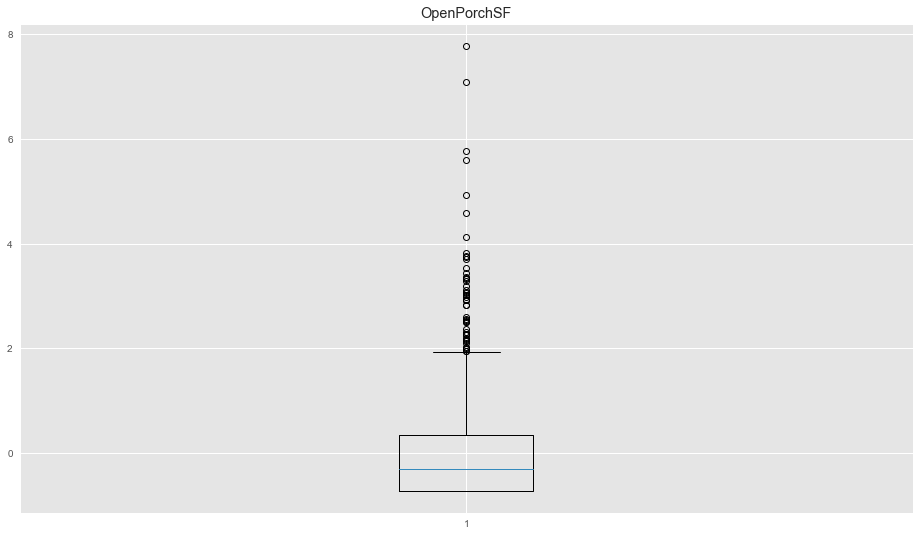

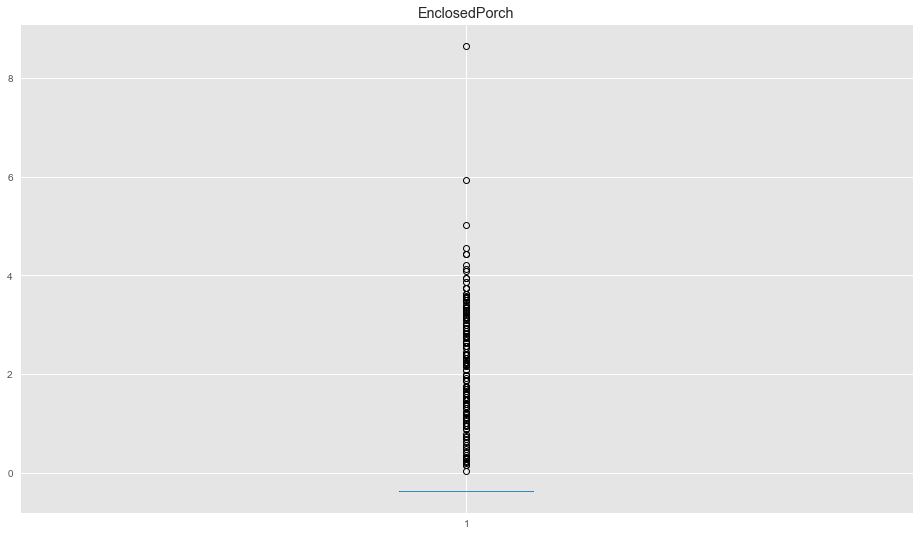

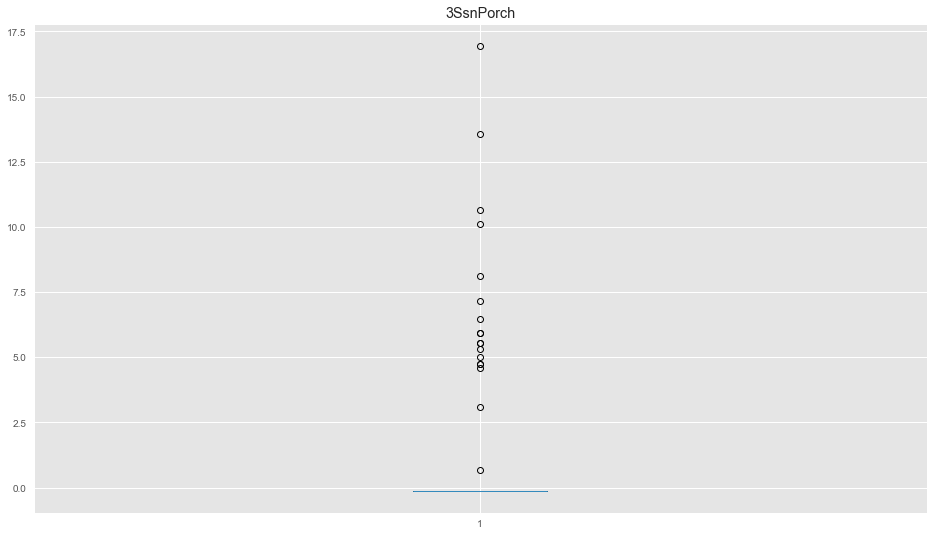

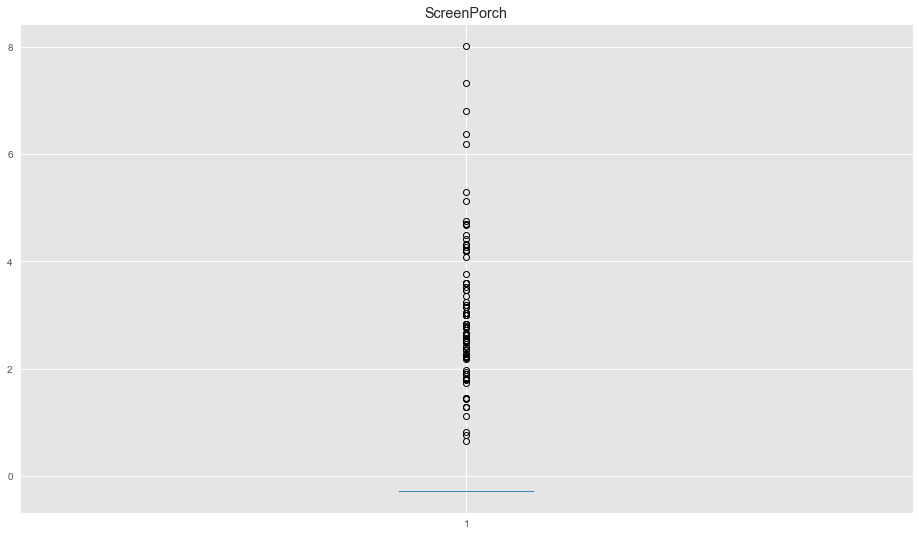

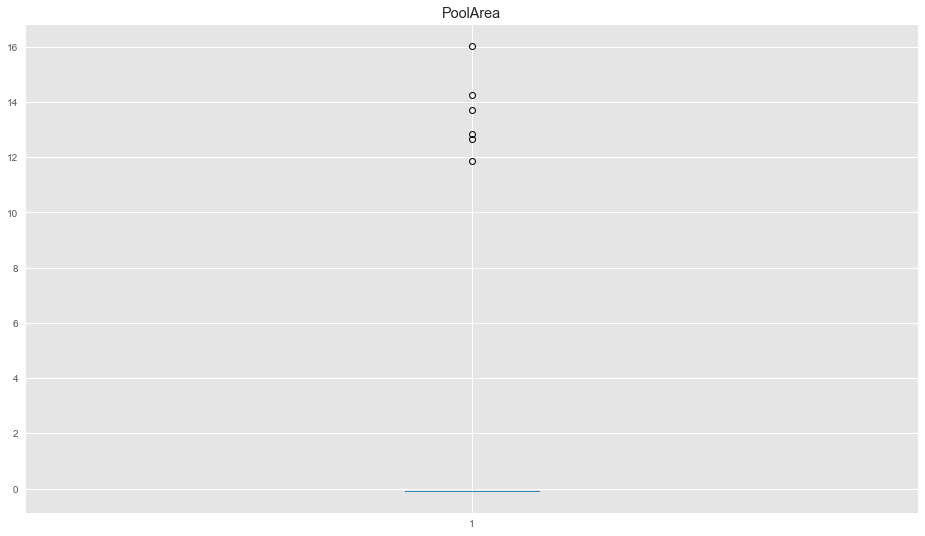

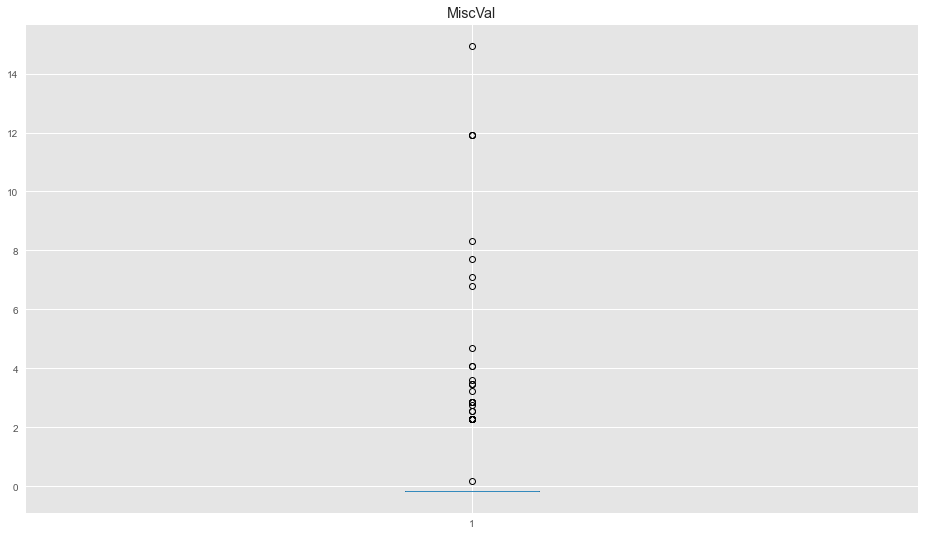

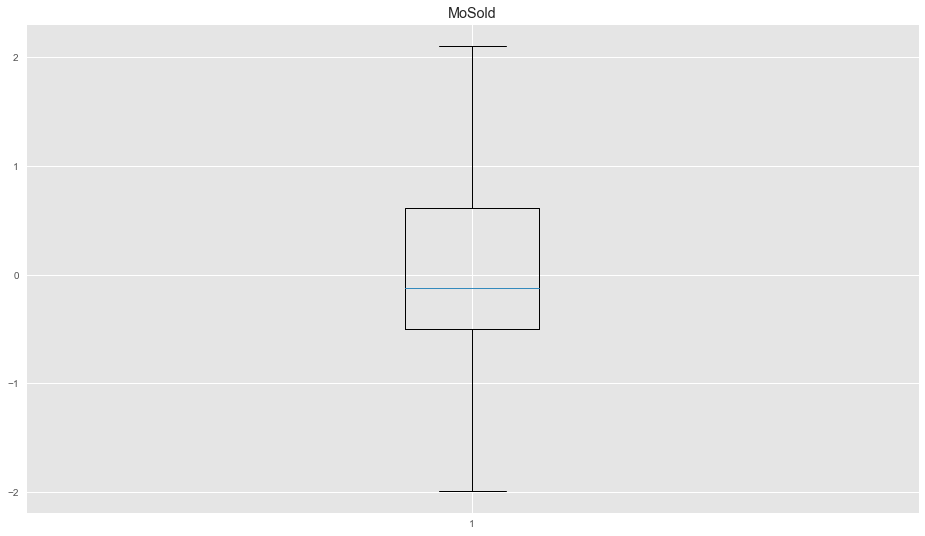

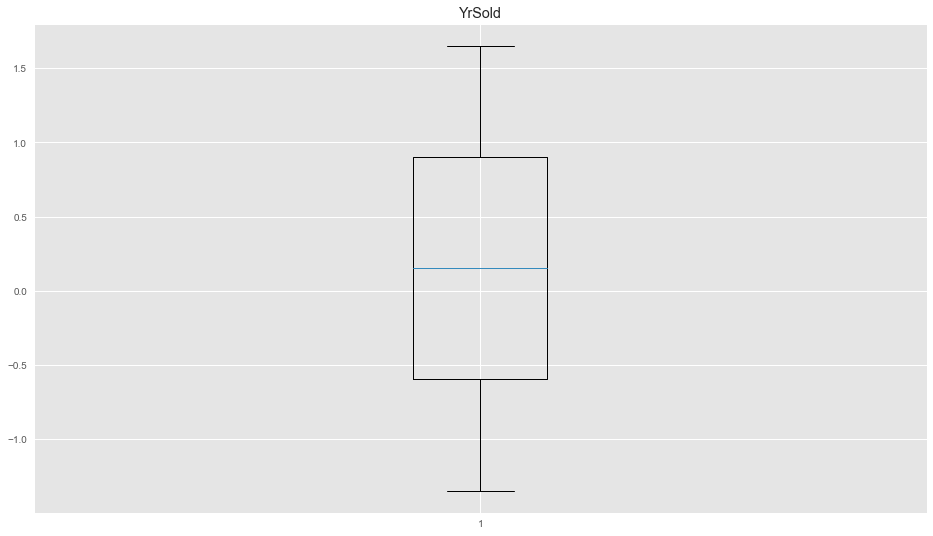

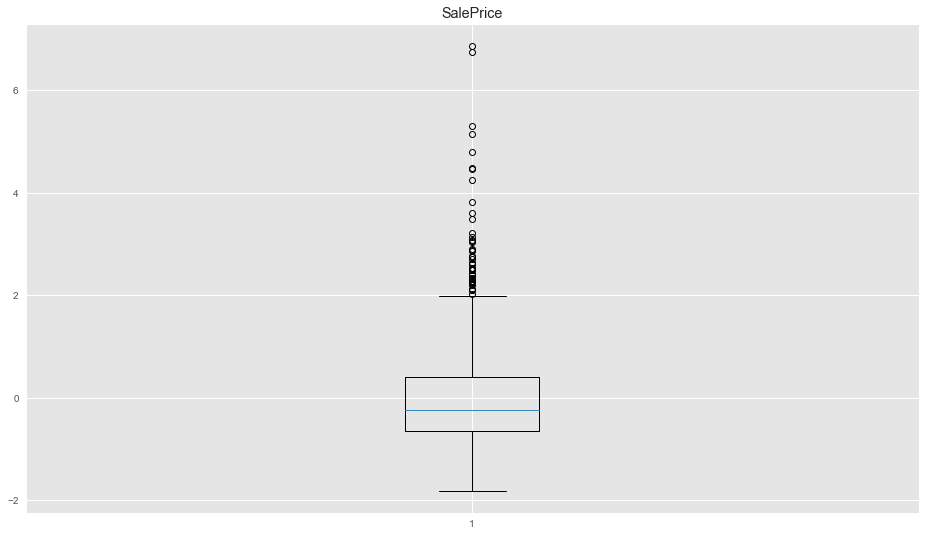

In [8]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Eliminacion de datos atipicos

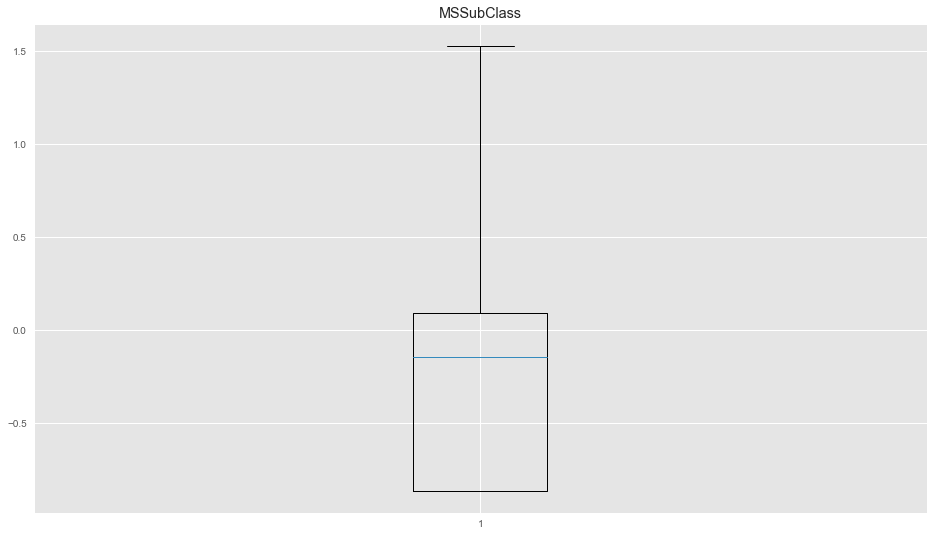

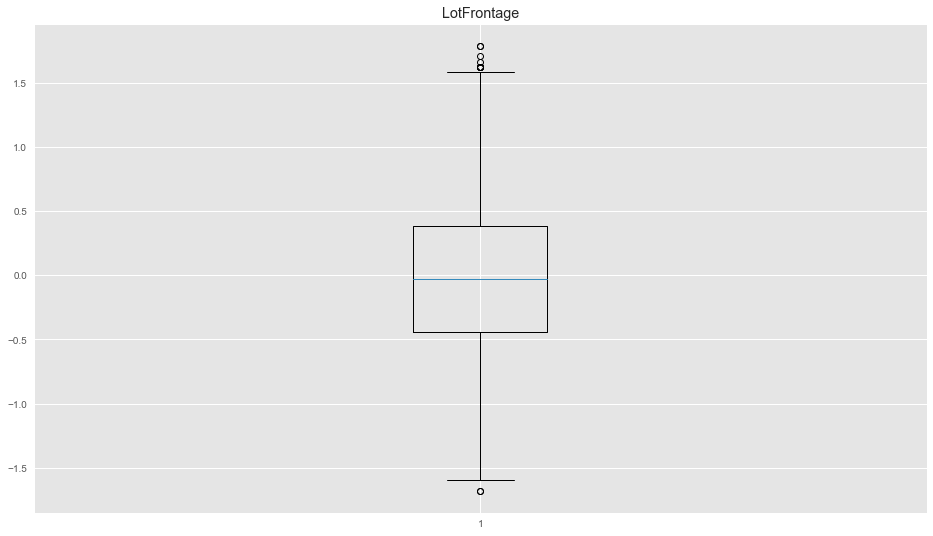

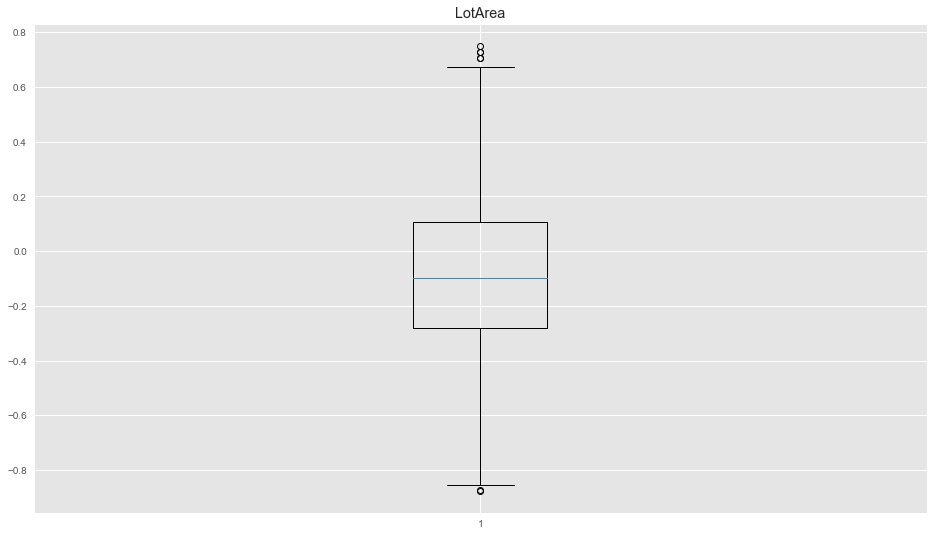

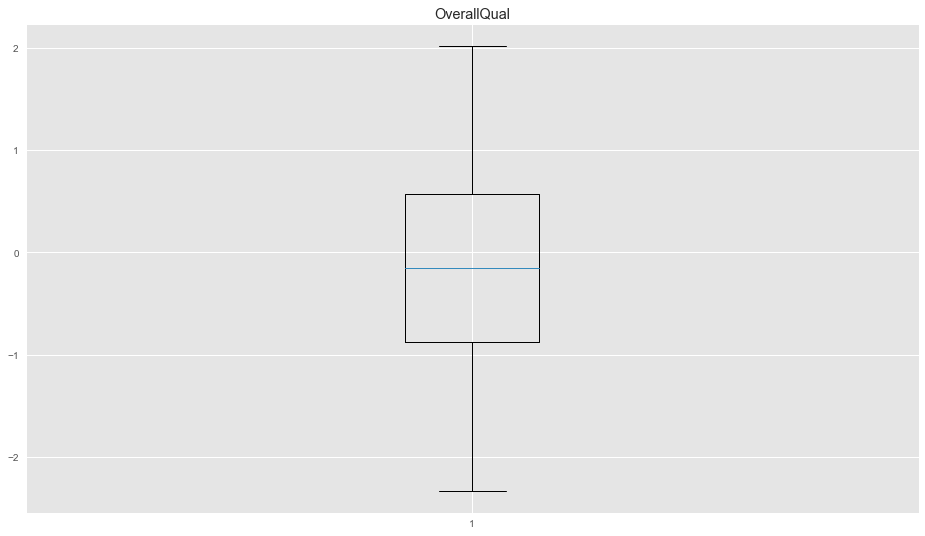

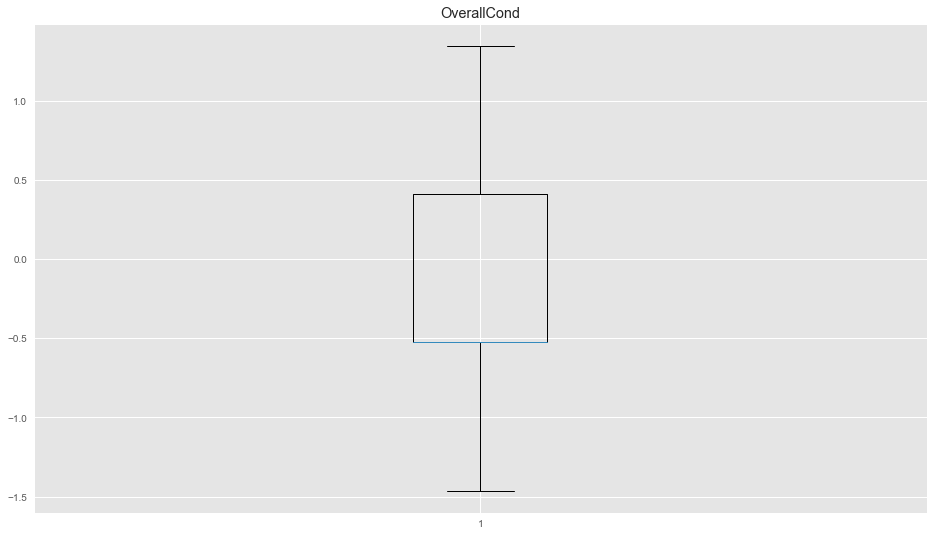

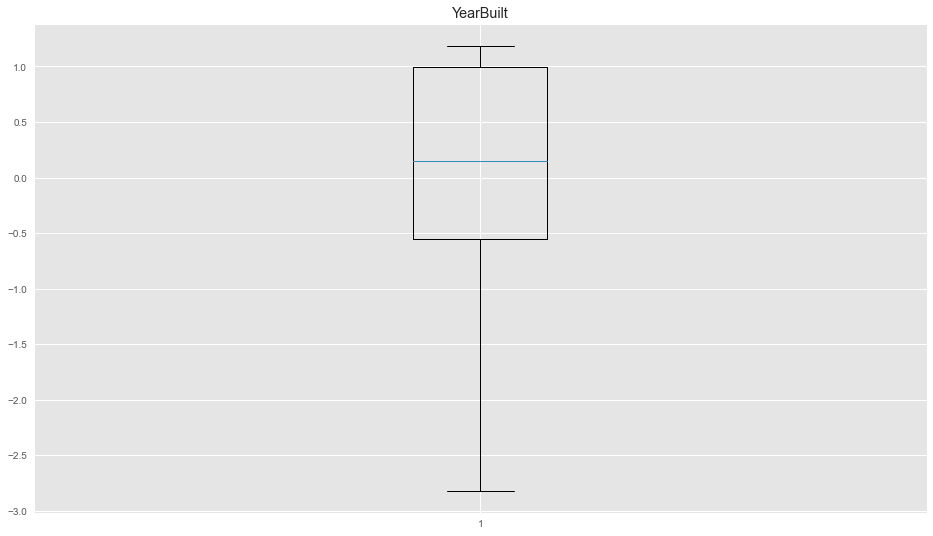

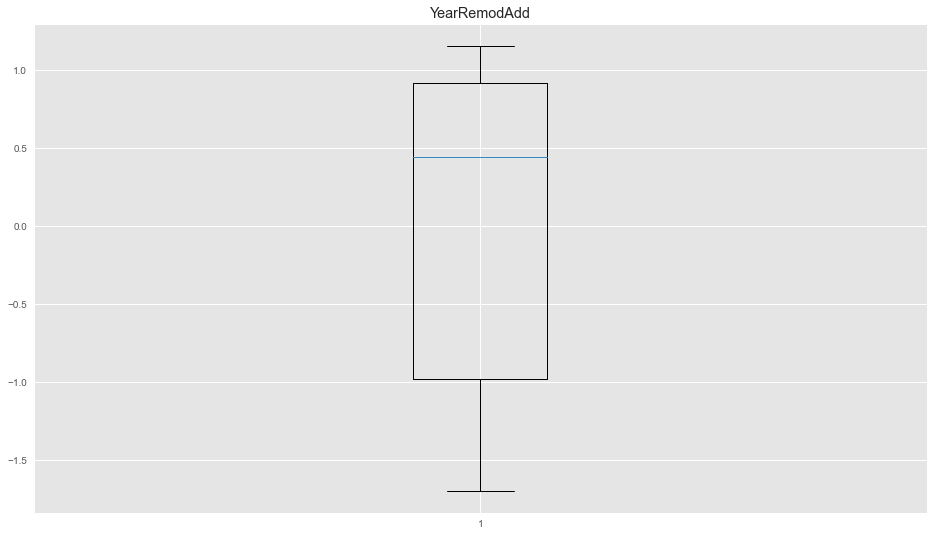

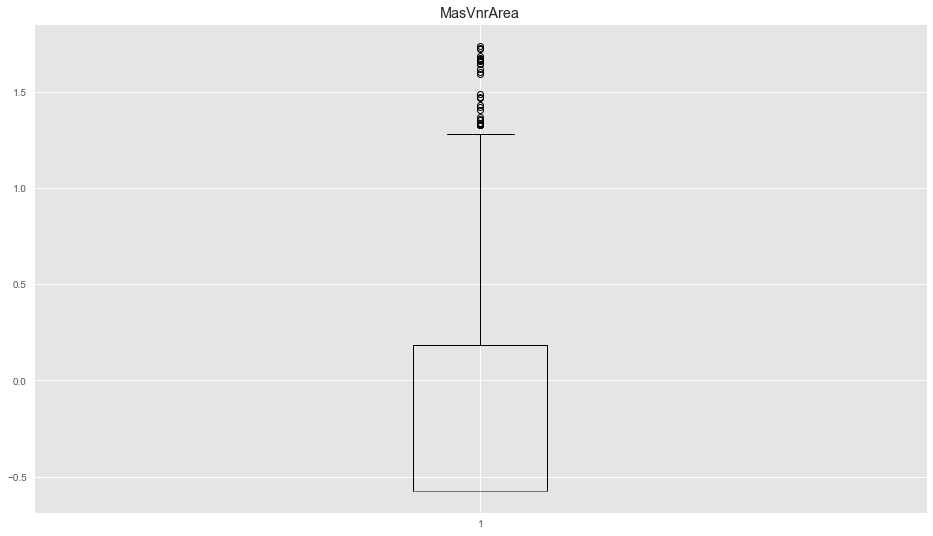

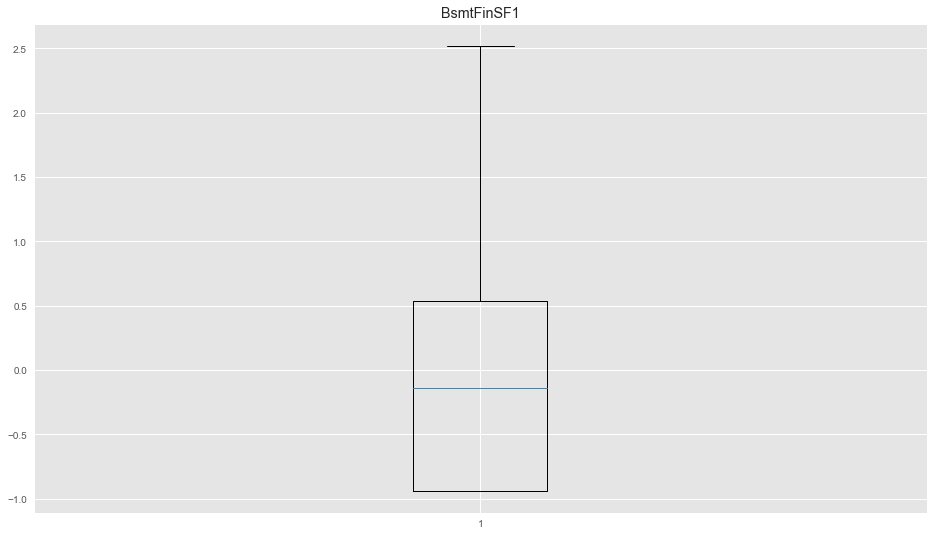

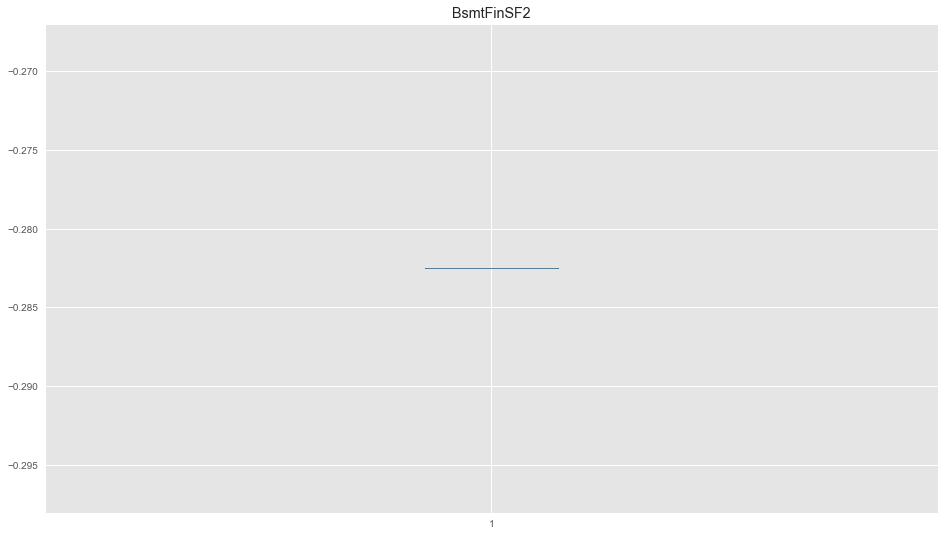

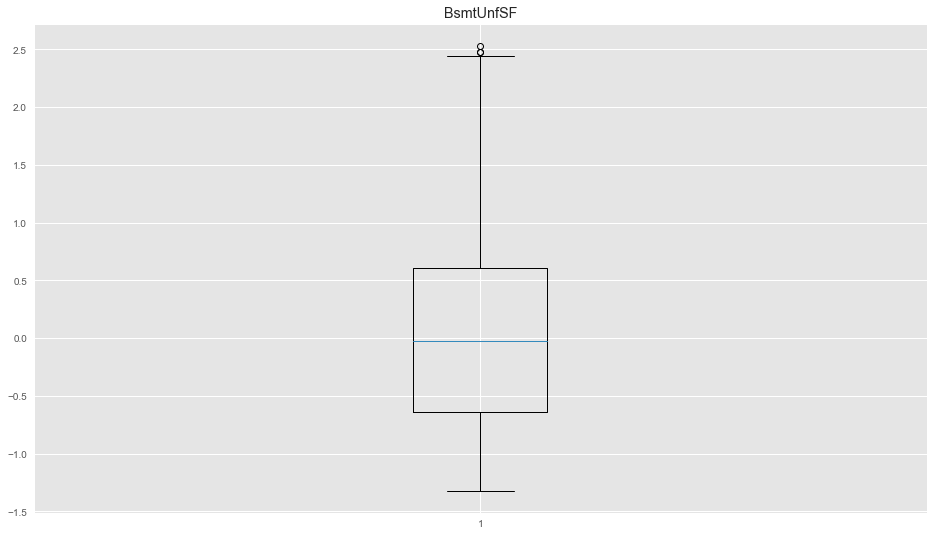

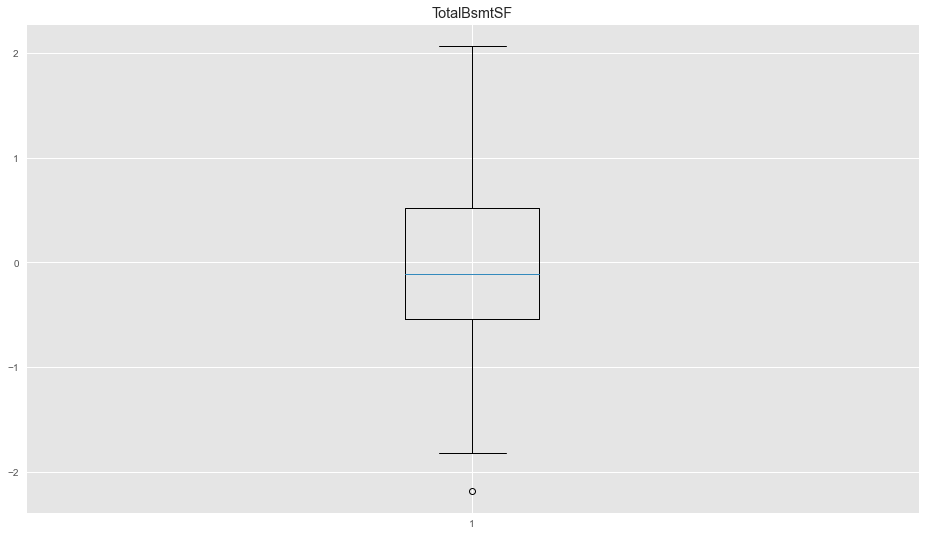

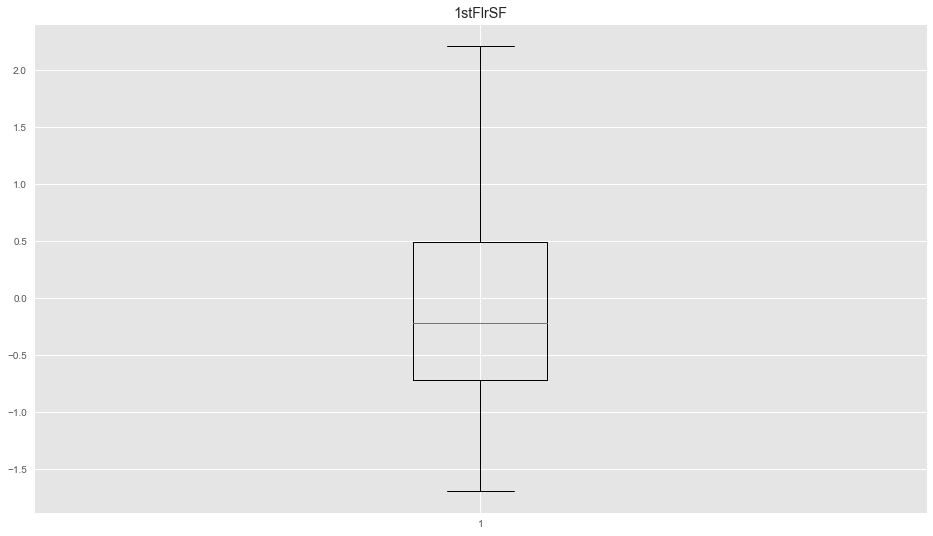

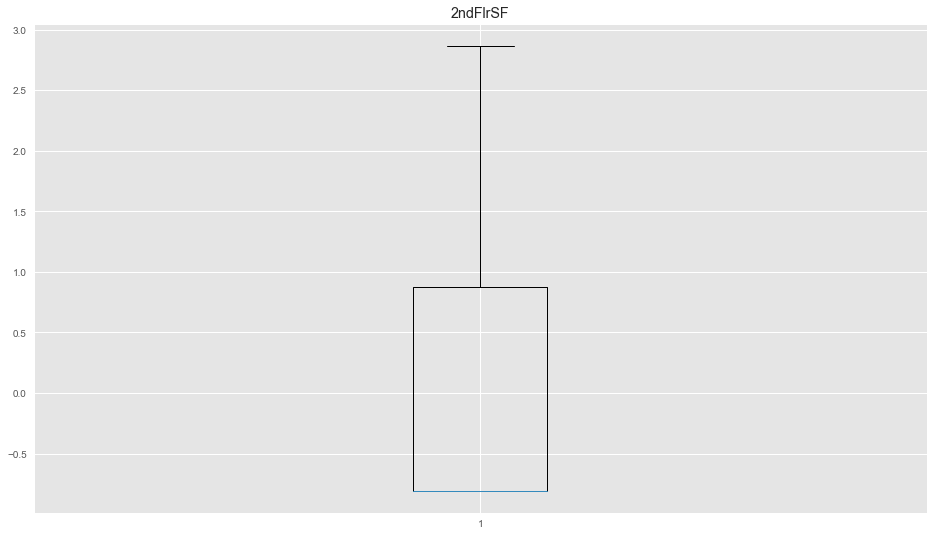

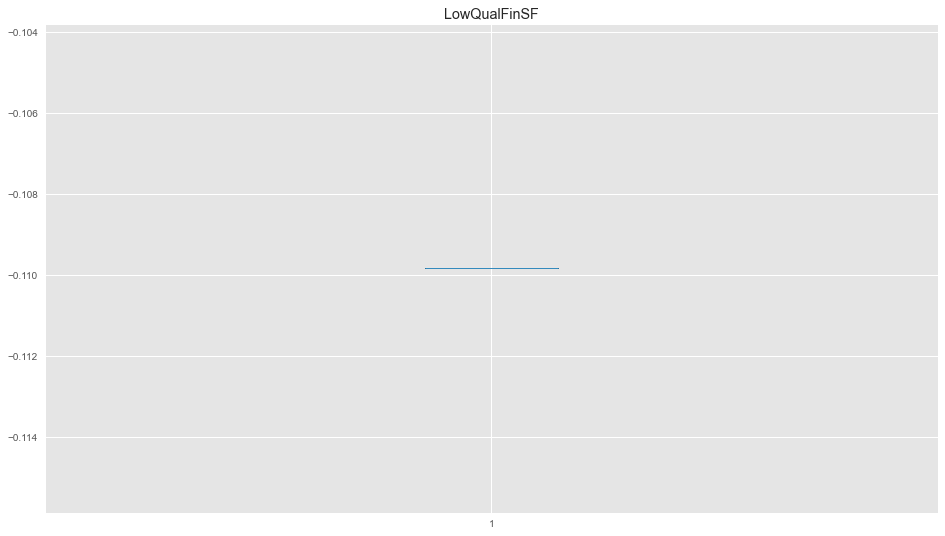

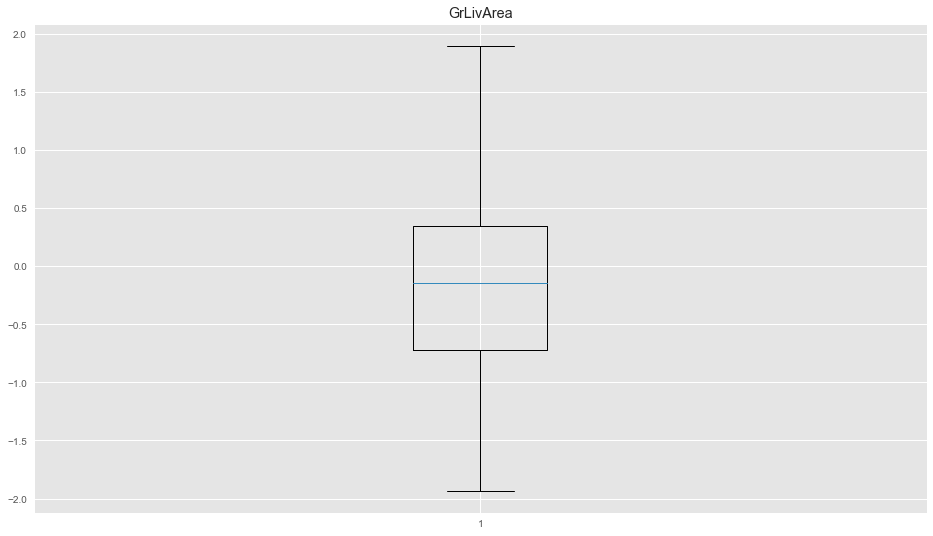

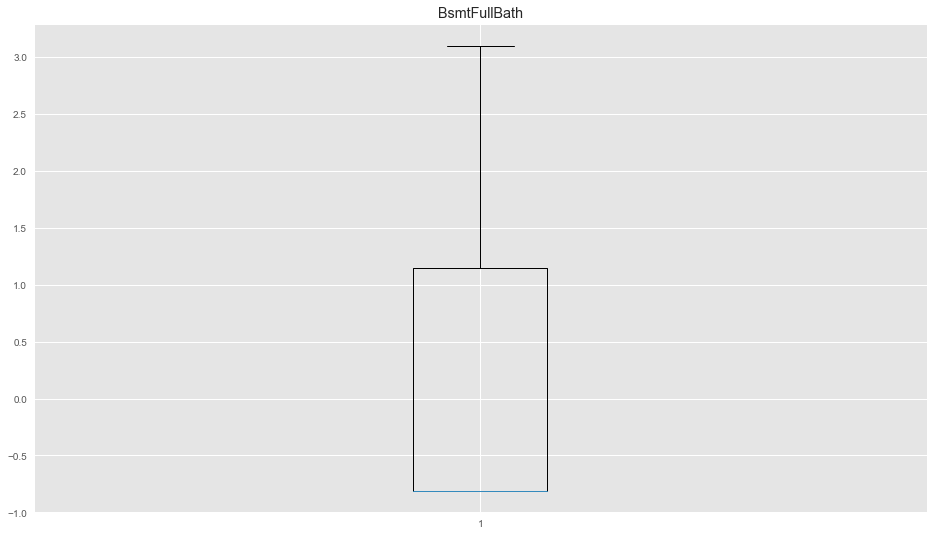

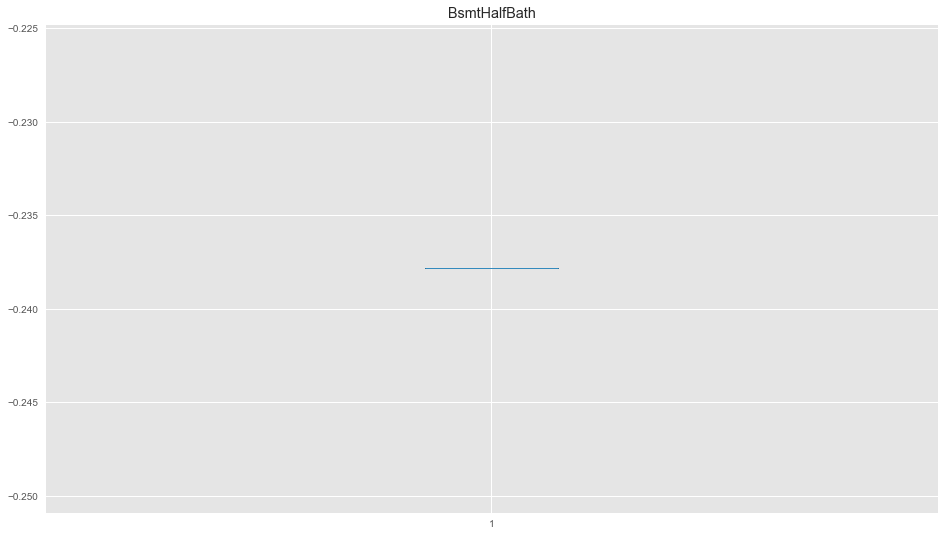

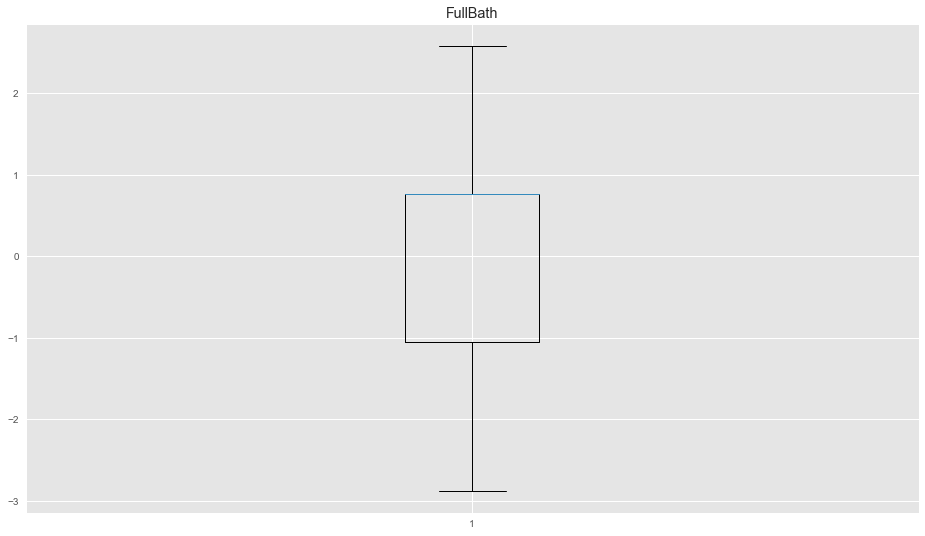

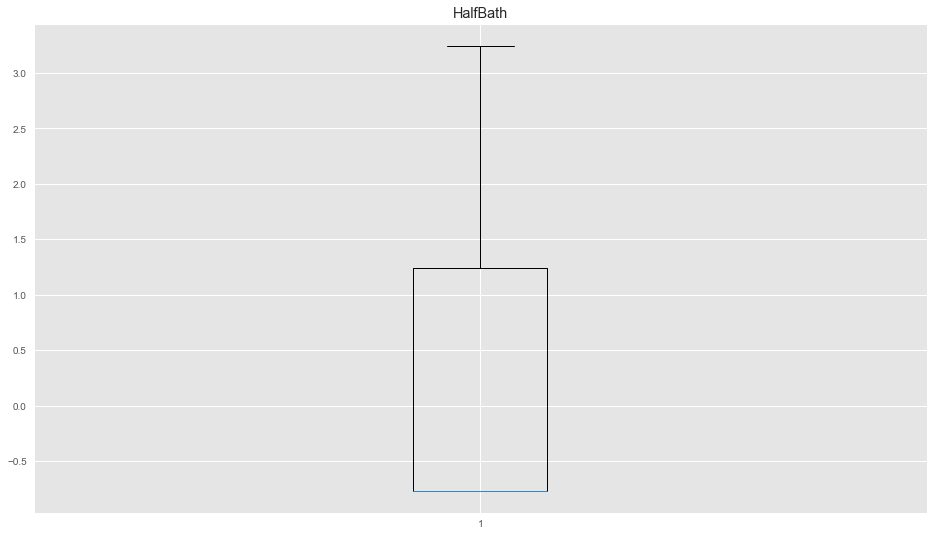

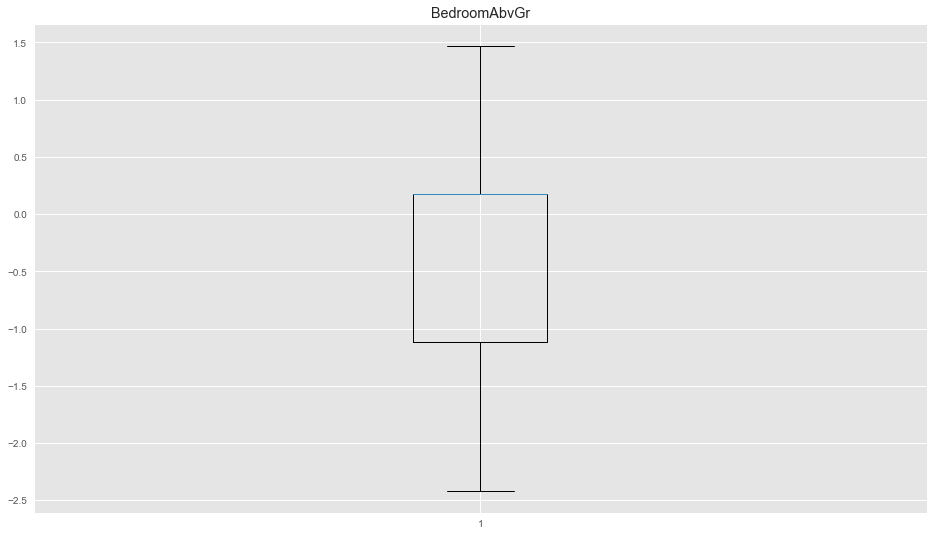

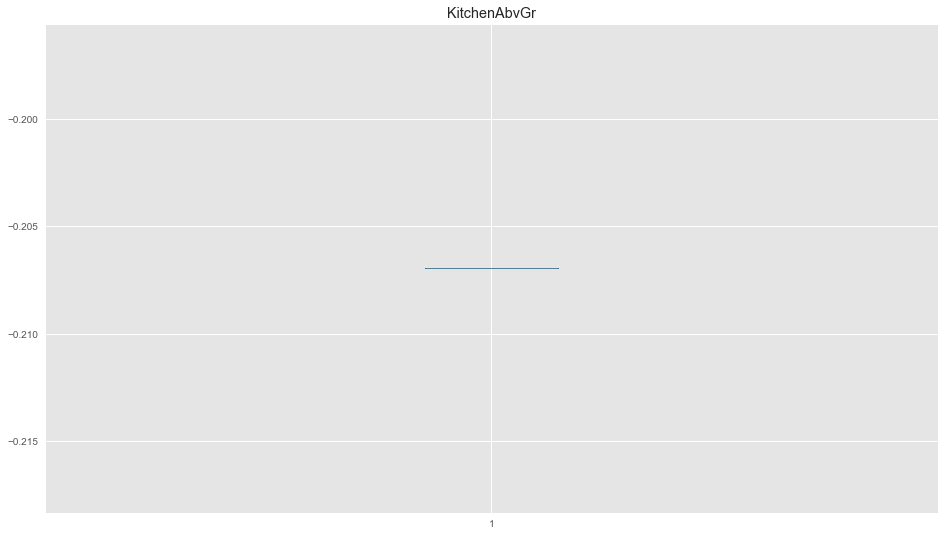

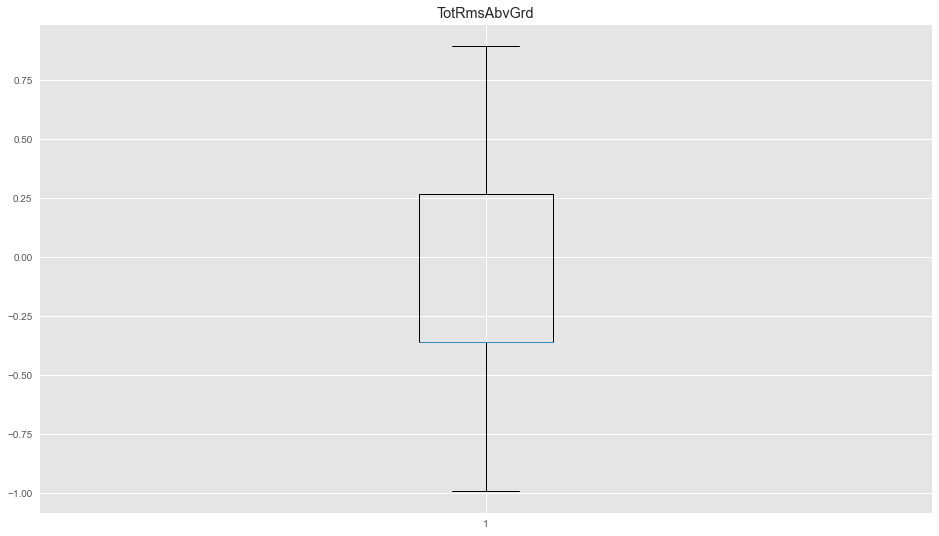

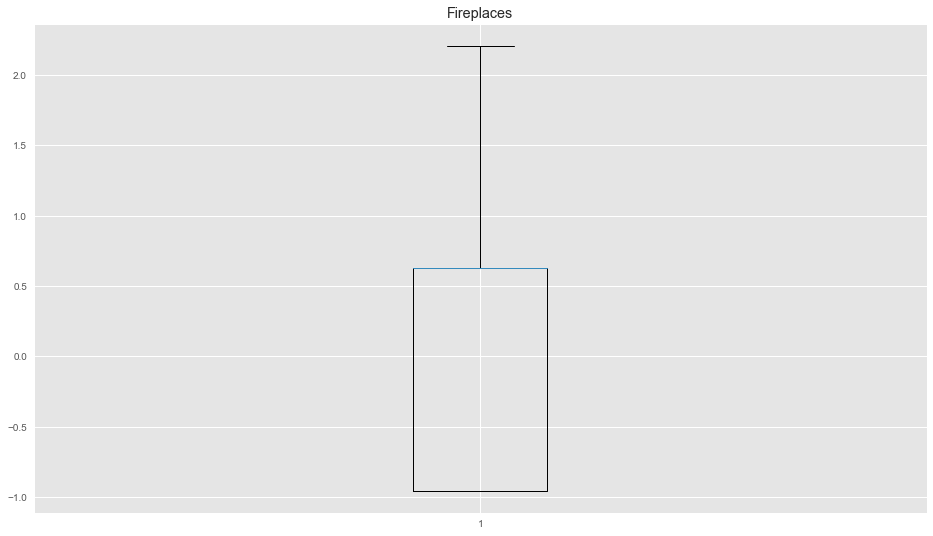

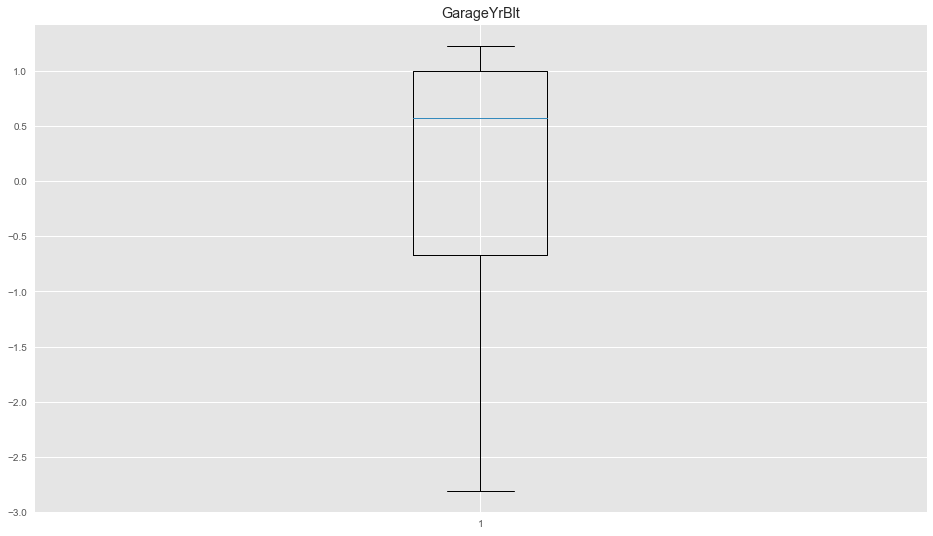

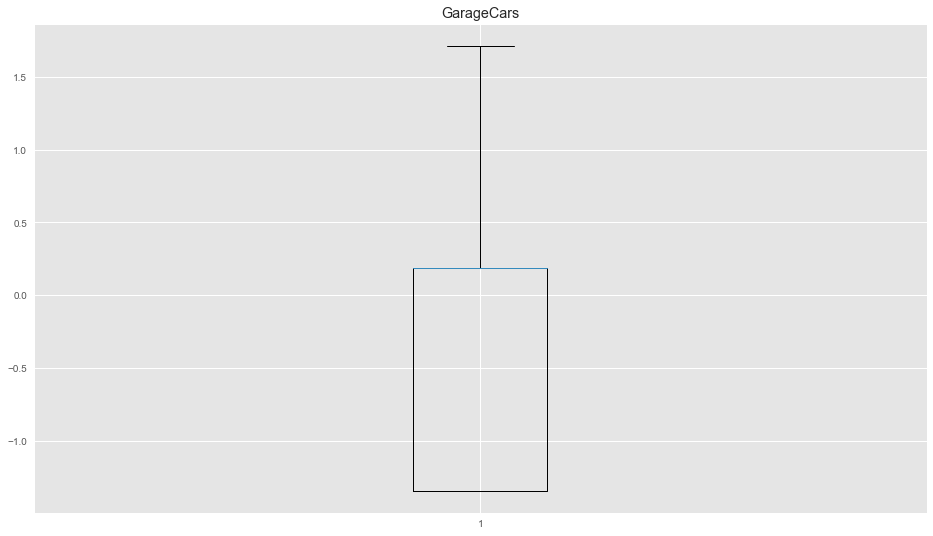

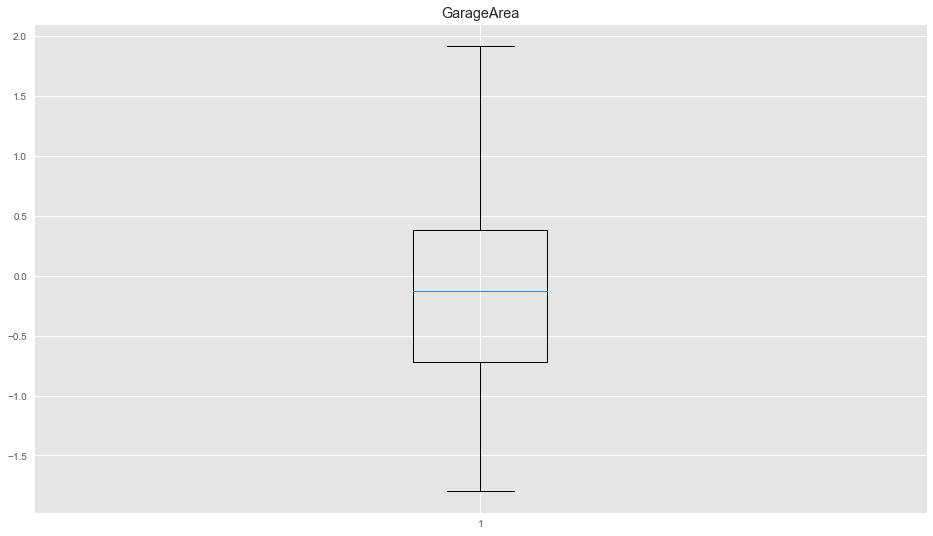

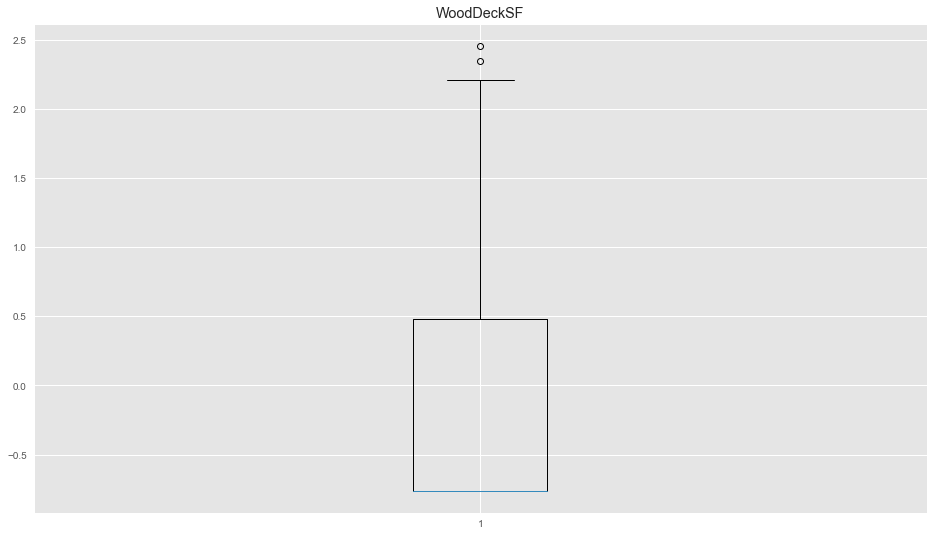

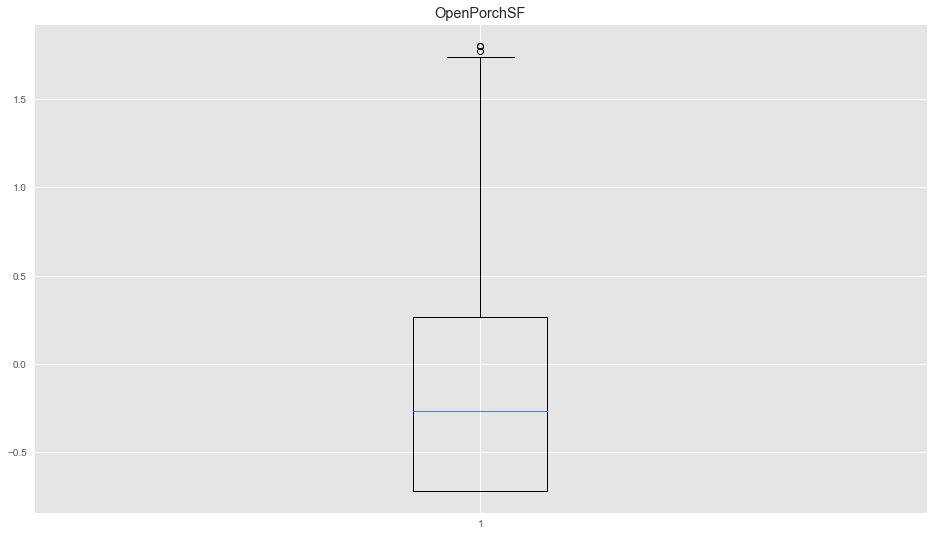

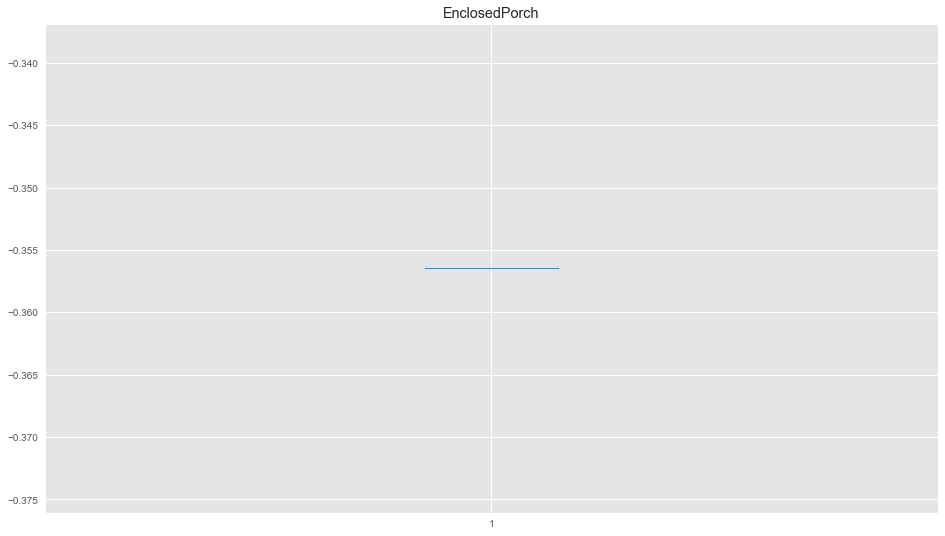

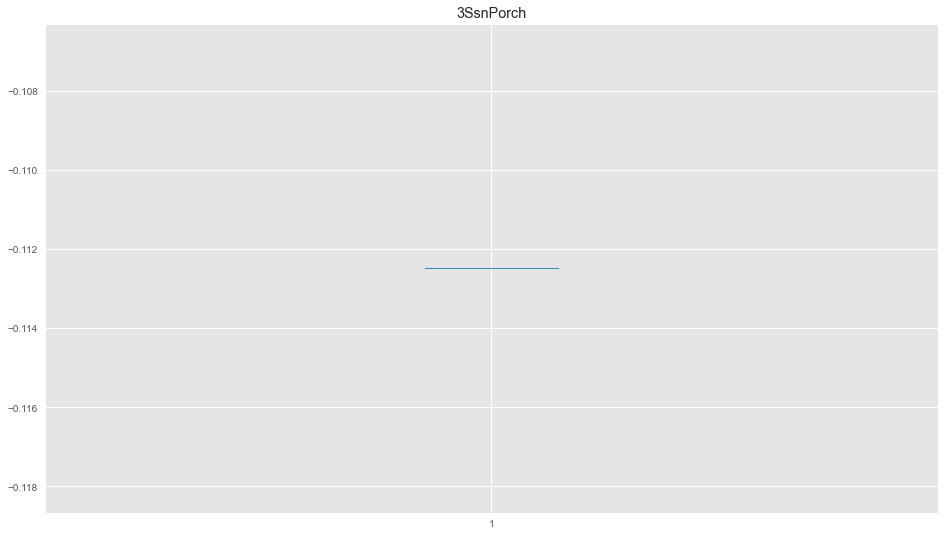

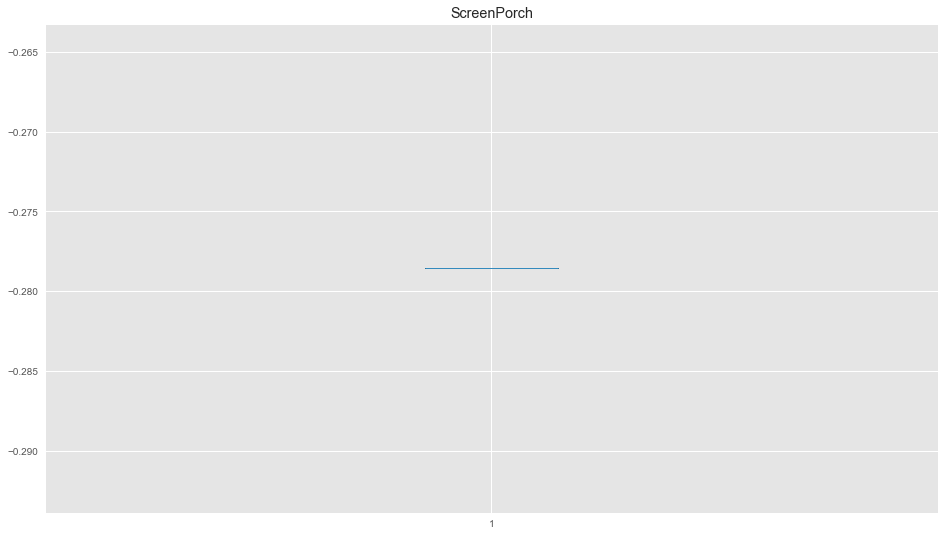

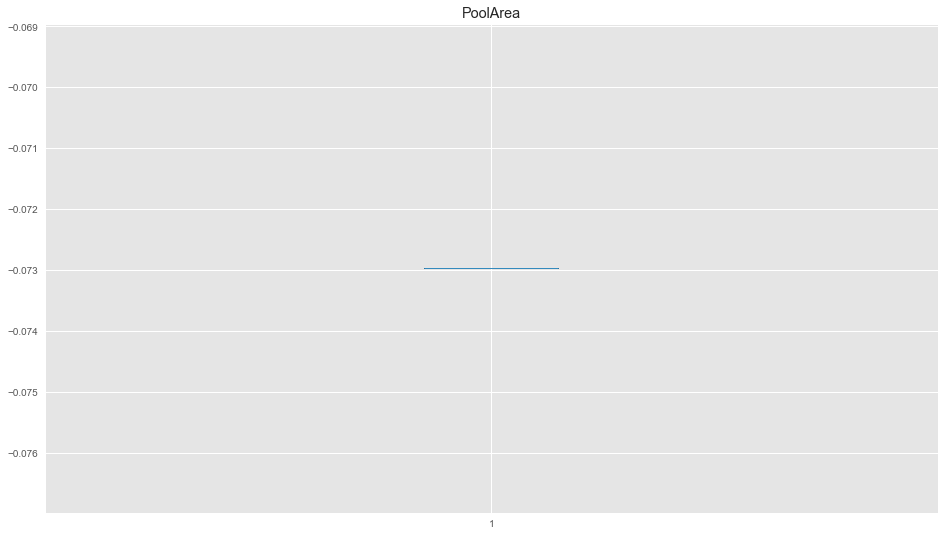

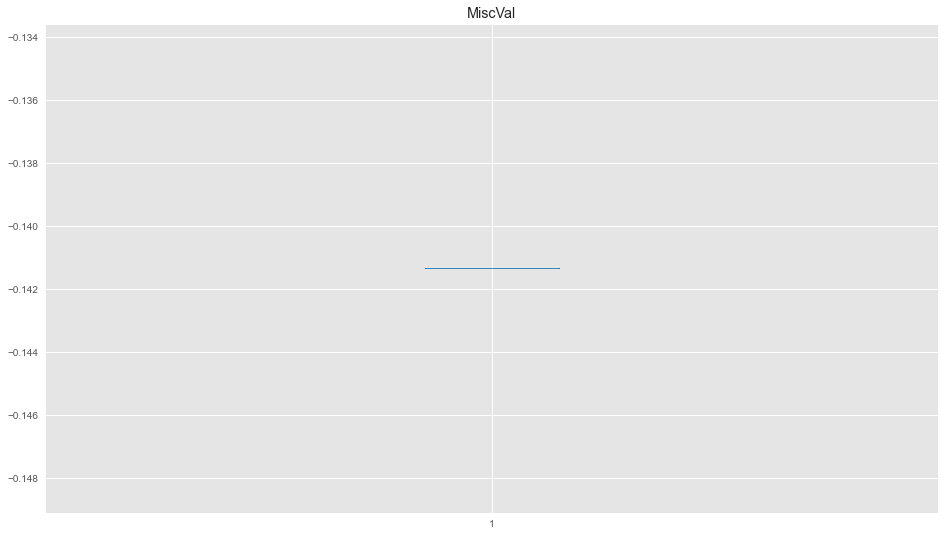

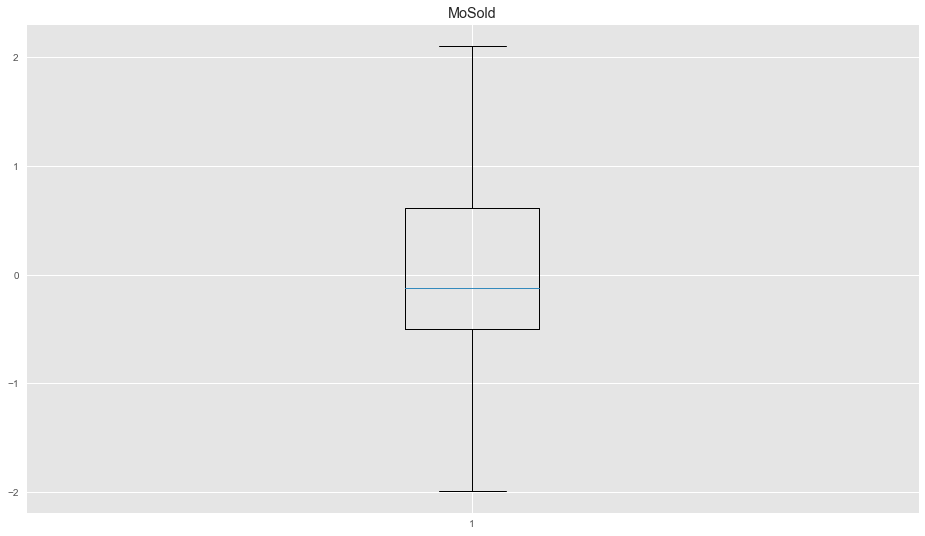

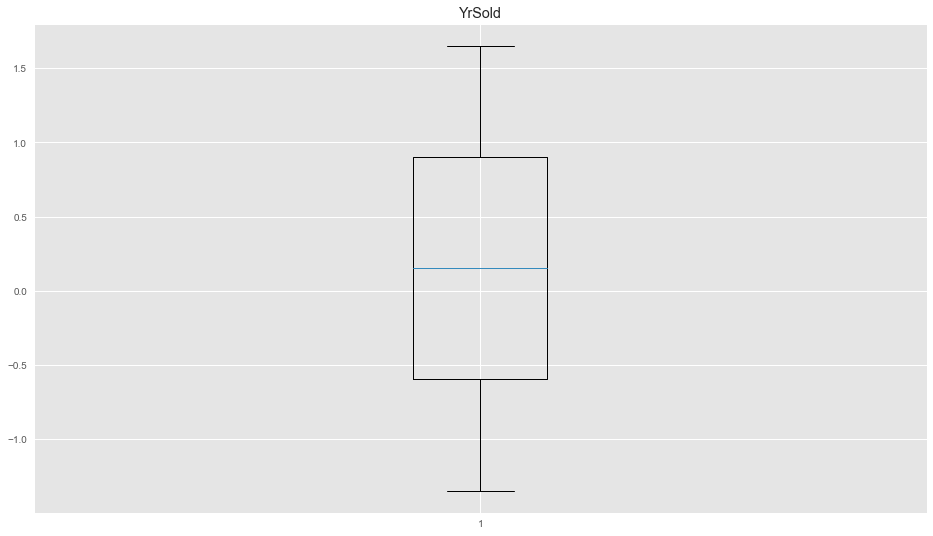

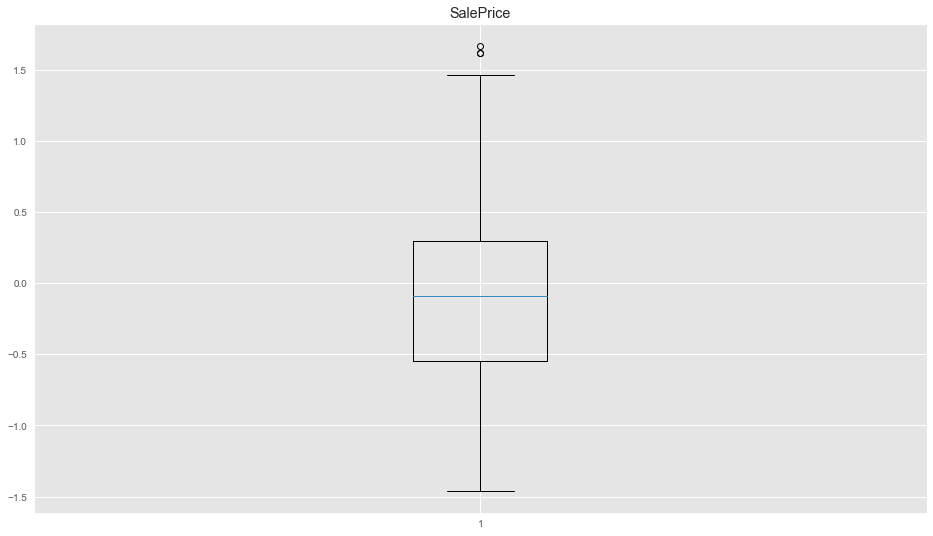

In [9]:
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Muestra Representativa de los Datos

In [10]:
sample = entrenamiento.copy()

sample["combined"] = list(
    zip(
        sample["MSSubClass"],
        sample["LotFrontage"],
        sample["LotArea"],
        sample["OverallQual"],
        sample["OverallCond"],
        sample["YearBuilt"],
        sample["YearRemodAdd"],
        sample["MasVnrArea"],
        sample["BsmtFinSF1"],
        sample["BsmtFinSF2"],
        sample["BsmtUnfSF"],
        sample["TotalBsmtSF"],
        sample["1stFlrSF"],
        sample["2ndFlrSF"],
        sample["LowQualFinSF"],
        sample["GrLivArea"],
        sample["BsmtFullBath"],
        sample["BsmtHalfBath"],
        sample["FullBath"],
        sample["HalfBath"],
        sample["BedroomAbvGr"],
        sample["KitchenAbvGr"],
        sample["TotRmsAbvGrd"],
        sample["Fireplaces"],
        sample["GarageYrBlt"],
        sample["GarageCars"],
        sample["GarageArea"],
        sample["WoodDeckSF"],
        sample["OpenPorchSF"],
        sample["EnclosedPorch"],
        sample["3SsnPorch"],
        sample["ScreenPorch"],
        sample["PoolArea"],
        sample["MiscVal"],
        sample["MoSold"],
        sample["YrSold"],
        sample["SalePrice"]
    )
)

combined_weight = sample['combined'].value_counts(normalize=True)

sample['combined_weight'] = sample['combined'].apply(lambda x: combined_weight[x])

sample = sample.sample(65, weights=sample['combined_weight'])
sample = sample.drop(["combined_weight"], axis=1)

sample.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,-0.277881,-0.123788,-0.130711,0.124784,-0.107609,0.436573,0.304813,-0.130116,-0.096205,-0.282519,...,0.067707,-0.066056,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-0.126448,-0.008316,-0.055863
std,0.718086,0.612318,0.311940,0.806567,0.721915,0.801611,0.907653,0.623408,0.859606,0.000000,...,0.855283,0.646323,5.594315e-17,1.398579e-17,0.000000,0.000000,0.000000,0.865052,1.055092,0.560557
min,-0.865309,-1.510931,-0.874608,-1.602169,-1.461387,-1.526264,-1.697107,-0.572493,-0.935981,-0.282519,...,-0.759918,-0.716419,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-1.614624,-1.345064,-1.457920
25%,-0.865309,-0.439509,-0.334218,-0.153757,-0.525264,-0.170014,-0.650782,-0.572493,-0.935981,-0.282519,...,-0.759918,-0.716419,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-0.498492,-0.596024,-0.488031
50%,-0.625919,-0.027423,-0.176517,0.570450,-0.525264,0.895612,0.776025,-0.572493,-0.184463,-0.282519,...,0.101665,-0.126266,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-0.126448,0.153015,-0.071159
75%,0.092254,0.261036,0.034080,0.570450,0.410858,1.089362,0.966266,0.182121,0.705830,-0.282519,...,0.618616,0.246463,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.245595,0.902055,0.337158
max,1.528599,1.703336,0.664269,1.294656,1.346981,1.186237,1.108947,1.723010,1.668713,-0.282519,...,2.456660,1.768438,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,2.105815,1.651095,1.258975


### Correlacion de variables

#### Original

<AxesSubplot:>

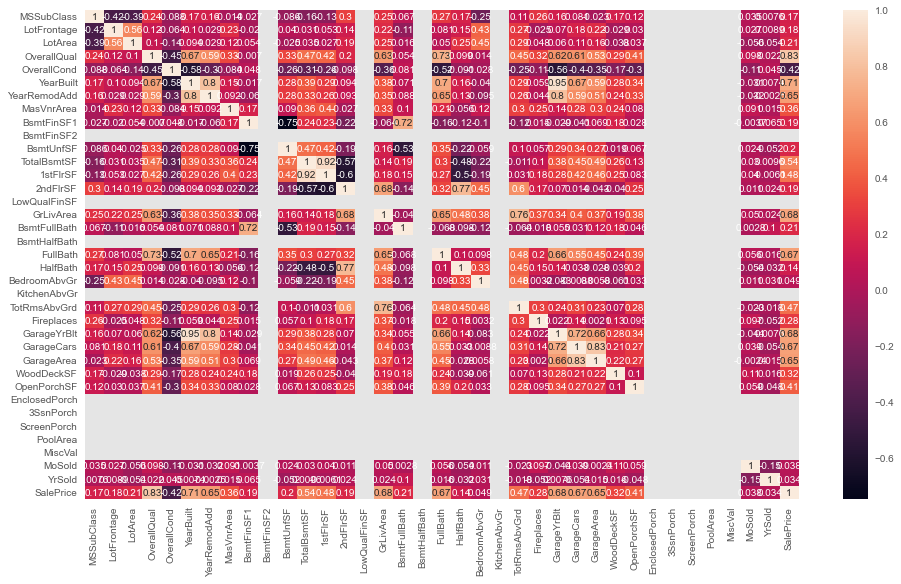

In [11]:
correlacion = entrenamiento.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### Muestra

<AxesSubplot:>

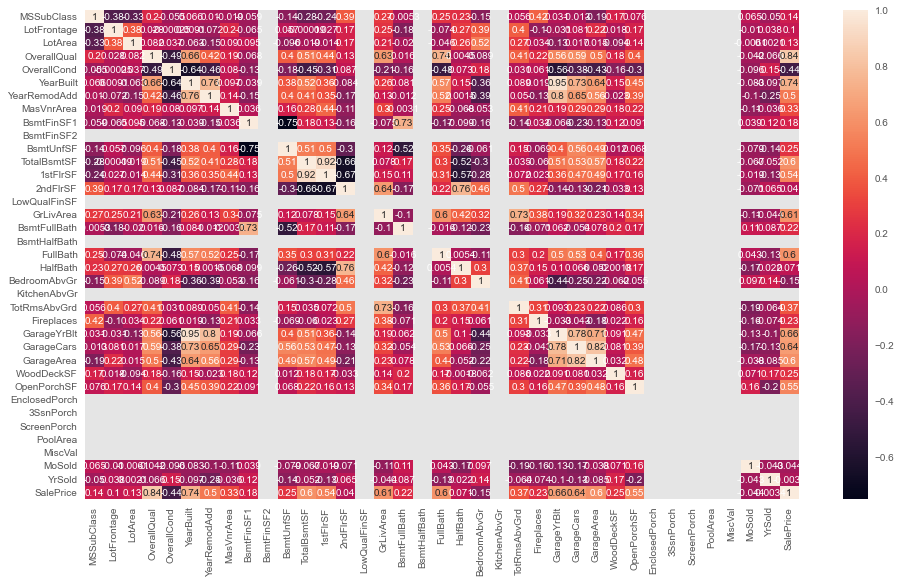

In [12]:
correlacion = sample.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

In [13]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [14]:
entrenamiento['Quality-Price'] = entrenamiento['OverallQual'] / entrenamiento['SalePrice']
entrenamiento['Quality-Price'] = entrenamiento['Quality-Price'] / max(entrenamiento['Quality-Price'])
entrenamiento

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,KmeansCluster,Quality-Price
0,0.092254,-0.233466,-0.205793,0.570450,-0.525264,0.992487,0.823585,0.461803,0.571326,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-1.614624,0.153015,0.277037,2,0.014954
2,0.092254,-0.109840,0.138640,0.570450,-0.525264,0.927903,0.776025,0.282384,0.101627,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.989683,0.153015,0.457762,2,0.009050
6,-0.865309,0.178619,-0.004792,1.294656,-0.525264,1.024778,0.918706,0.409032,1.986828,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.617639,-0.596024,1.463796,1,0.006423
10,-0.865309,-0.027423,0.132489,-0.877963,-0.525264,-0.234597,-0.983703,-0.572493,0.998325,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-1.614624,0.153015,-0.674780,0,0.009449
13,-0.865309,0.837956,0.065079,0.570450,-0.525264,1.089362,1.013826,1.042275,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.617639,-0.596024,1.132467,1,0.003658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.092254,0.384662,-0.015125,1.294656,-0.525264,0.734153,0.490664,1.738841,1.367679,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,2.105815,-0.596024,0.656559,1,0.014320
1448,-0.147137,-0.027423,0.202237,-1.602169,1.346981,-2.010640,0.680905,-0.572493,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-0.498492,-0.596024,-0.885625,0,0.013138
1451,-0.865309,0.302245,-0.105908,1.294656,-0.525264,1.153945,1.108947,0.451249,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-0.498492,0.902055,1.223914,1,0.007682
1454,-0.865309,-0.357092,-0.322655,0.570450,-0.525264,1.024778,0.918706,-0.572493,-0.060633,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,1.361727,0.902055,-0.006098,1,-0.679336


In [15]:
l = 0
for col in entrenamiento.columns:
    print(col + "       " + str(l))
    l = l + 1

MSSubClass       0
LotFrontage       1
LotArea       2
OverallQual       3
OverallCond       4
YearBuilt       5
YearRemodAdd       6
MasVnrArea       7
BsmtFinSF1       8
BsmtFinSF2       9
BsmtUnfSF       10
TotalBsmtSF       11
1stFlrSF       12
2ndFlrSF       13
LowQualFinSF       14
GrLivArea       15
BsmtFullBath       16
BsmtHalfBath       17
FullBath       18
HalfBath       19
BedroomAbvGr       20
KitchenAbvGr       21
TotRmsAbvGrd       22
Fireplaces       23
GarageYrBlt       24
GarageCars       25
GarageArea       26
WoodDeckSF       27
OpenPorchSF       28
EnclosedPorch       29
3SsnPorch       30
ScreenPorch       31
PoolArea       32
MiscVal       33
MoSold       34
YrSold       35
SalePrice       36
KmeansCluster       37
Quality-Price       38


#### Explicacion

El preprocesamiento a seguir fue primero eliminar los datos de variables cualitativas para solo trabajar con las cuantitativas. Segundo, se obtuvieron las graficas de cajas de bigotes para saber cuantos datos atipicos habian por variable y despues se usaba la funcion para eliminar estos (o su mayoria). Algunas variables solo tenian valores 0 por los cuales no eran necesarios para el analisis de correlacion pero tampoco afectaban su calculo.

Para saber que variables ibamos a tomar para tomar la variable de respuesta, primero, por medio de la grafica de correlacion, vimos que variables estaban fuertemente relacionas (>=0.5) con la variable SalePrice dado a que esta nos podia indicar si una casa era económica, intermedia o cara por medio de su precio y ver que variables definian este. Con esto, se obtuvieron que las variables que tenian una fuerte relacion con SalePrice eran: "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea" y confirmamos este hecho por medio del VAT.

Por ultimo, con las graficas de codos se pudo el numero de klusters indicados para cada uno de los agrupamientos dando como resultado en todos k = 3. Con esto, se pudieron formas grupos para las graficas de k-medias.

## 6. Elabore  el  árbol  de  clasificación  utilizando  el  conjunto  de  entrenamiento  y  la  variable  respuesta que creó en el punto 4.  Explique los resultados a los que llega. Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [16]:
#Copiar los datos
arbolDF = entrenamiento.copy()
arbolDF = arbolDF[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea", "KmeansCluster"]]
arbolDF

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageYrBlt,GarageCars,GarageArea,KmeansCluster
0,0.277037,0.570450,0.992487,0.823585,-0.496156,-0.822386,0.340998,0.762145,0.952659,0.185416,0.235536,2
2,0.457762,0.570450,0.927903,0.776025,-0.352547,-0.656658,0.486113,0.762145,0.875208,0.185416,0.549273,2
6,1.463796,1.294656,1.024778,0.918706,1.366265,1.347619,0.310447,0.762145,0.991385,0.185416,0.695683,1
10,-0.674780,-0.877963,-0.234597,-0.983703,-0.083282,-0.345917,-0.938302,-1.055651,-0.518907,-1.342904,-0.622012,0
13,1.132467,0.570450,1.089362,1.013826,0.935440,0.829718,-0.071433,0.762145,1.068835,1.713737,1.762389,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.656559,1.294656,0.734153,0.490664,0.320617,0.120194,1.066571,0.762145,0.642856,0.185416,0.277367,1
1448,-0.885625,-1.602169,-2.010640,0.680905,-1.160345,-0.977756,-0.354025,-1.055651,-1.099788,-1.342904,-0.622012,0
1451,1.223914,1.294656,1.153945,1.108947,1.112707,1.047236,0.088957,0.762145,1.146286,1.713737,1.762389,1
1454,-0.006098,0.570450,1.024778,0.918706,0.322861,0.122783,-0.592700,0.762145,0.991385,0.185416,-0.538348,1


In [17]:
from sklearn.model_selection import train_test_split

Y = arbolDF.pop("KmeansCluster")
X = arbolDF


#Dividiremos nuestros datos en dos gran conjuntos
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 1379 to 719
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     280 non-null    float64
 1   OverallQual   280 non-null    float64
 2   YearBuilt     280 non-null    float64
 3   YearRemodAdd  280 non-null    float64
 4   TotalBsmtSF   280 non-null    float64
 5   1stFlrSF      280 non-null    float64
 6   GrLivArea     280 non-null    float64
 7   FullBath      280 non-null    float64
 8   GarageYrBlt   280 non-null    float64
 9   GarageCars    280 non-null    float64
 10  GarageArea    280 non-null    float64
dtypes: float64(11)
memory usage: 26.2 KB


In [18]:
from sklearn.tree import DecisionTreeClassifier

#Se crea el modelo de arbol que utilizaremos
arbol = DecisionTreeClassifier(max_depth = 4)

arbol_ventas = arbol.fit(x_train, y_train)

In [19]:
y_predict_dtc = arbol_ventas.predict((x_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtc)
print("Error asociado al Arbol de Regresión: ", r_square)

Error asociado al Arbol de Regresión:  0.810483870967742


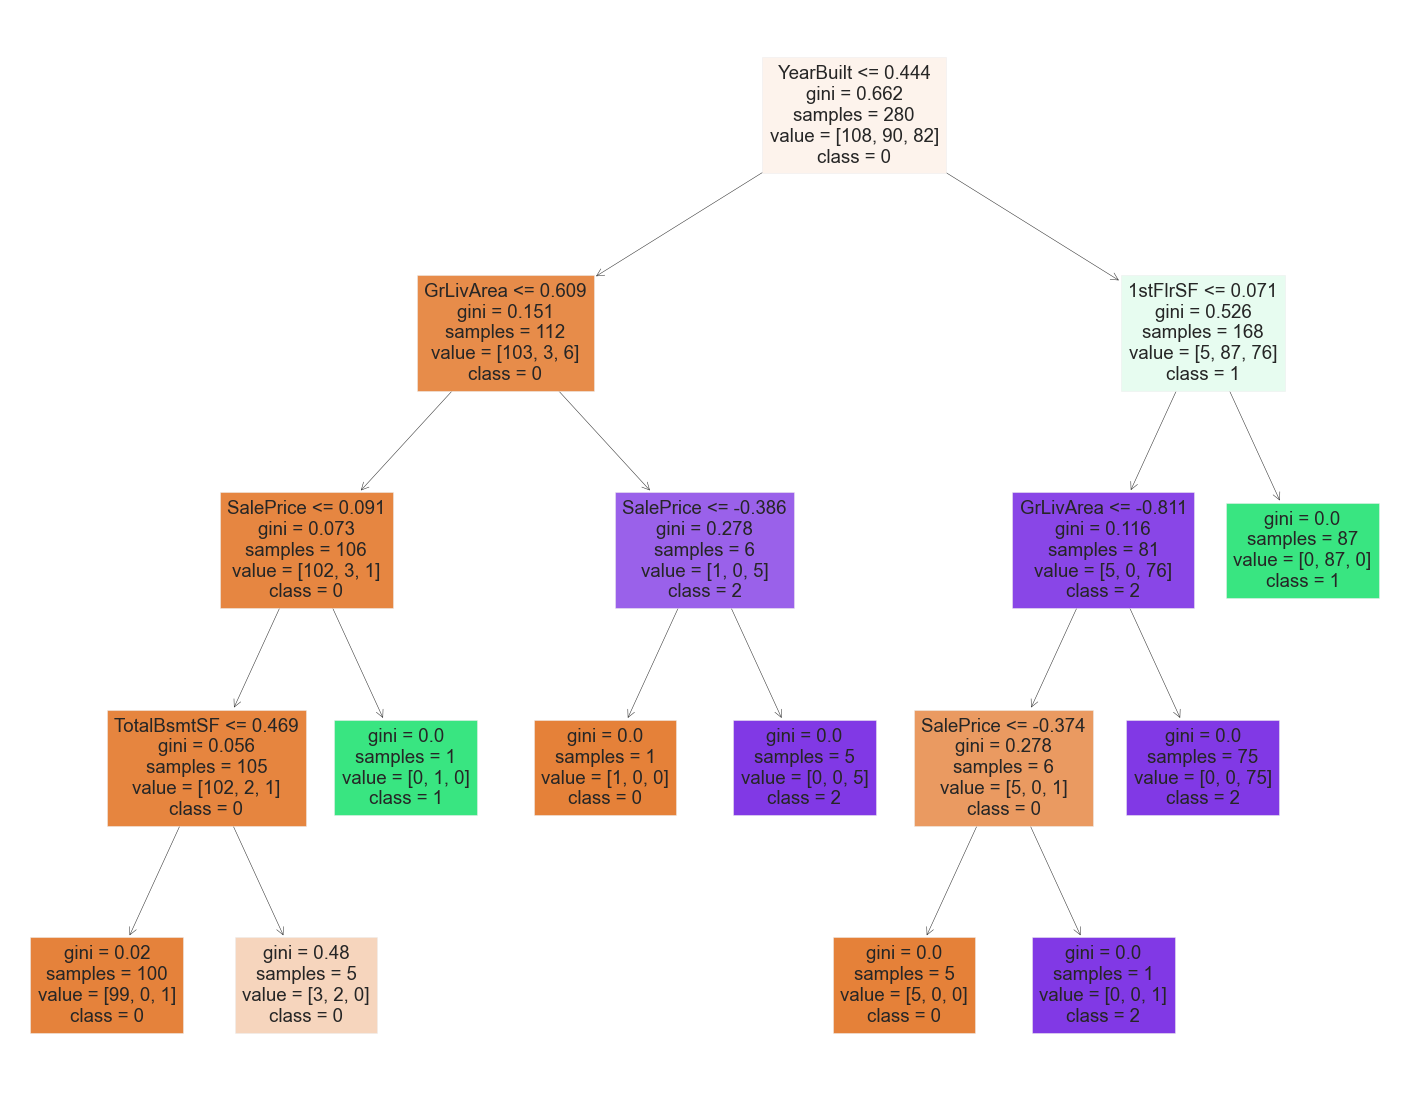

In [20]:
from sklearn import tree

fig = plt.figure(figsize= (25, 20)) #Le indicamos las dimensiones del gráfico

tree.plot_tree(arbol_ventas, feature_names = list(arbolDF.columns), class_names=['0','1','2'], filled=True)
plt.show()
fig.savefig('Arbol.png')

Explicación: Dentro del arbol de decisiones se puede ver claramente que este es determinado por varios factores, tales como el año de contrucción de la casa, cantidad de baños, si tiene o no garage, las dimensiones del garage, el año que se contruyo alguna remodelación a la misma casa, entre otras.

De arriba hacia abajo podemos interpretar algo tal que asi:

Si el año de construcción es menor a 1973, puede que tenga un precio basado en el area que ocupa el primer piso, el cual se determina por la cantidad de baños o area del garage. Puede darse el caso tambien de que el precio se determine por el area del garage primero, luego de este se ocuparia el año de construccion.

Existe otro caso, donde si el año de construccion fue mayor a 1973, nos vamos por el lado de ver la cantidad de carros qe caben en el garage. A partir de aca, tenemos dos caminos, cantidad de baños que incluyen el año de remodelacion o un precio fijo, o el otro camino que toma debido a las dimensiones del primer piso y del garage en si.

## 7. Elabore el árbol de regresión para predecir el precio de las viviendas utilizando el conjunto  de entrenamiento.  Explique los resultados a los que llega. Muestre el modelo gráficamente. 
El experimento debe ser reproducible por lo que debe fijar que los conjuntos de 
entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor(random_state = 0)

dtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [22]:
y_predict_dtr = dtReg.predict((x_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print("Error asociado al Arbol de Regresión: ", r_square)

Error asociado al Arbol de Regresión:  0.8736559139784947


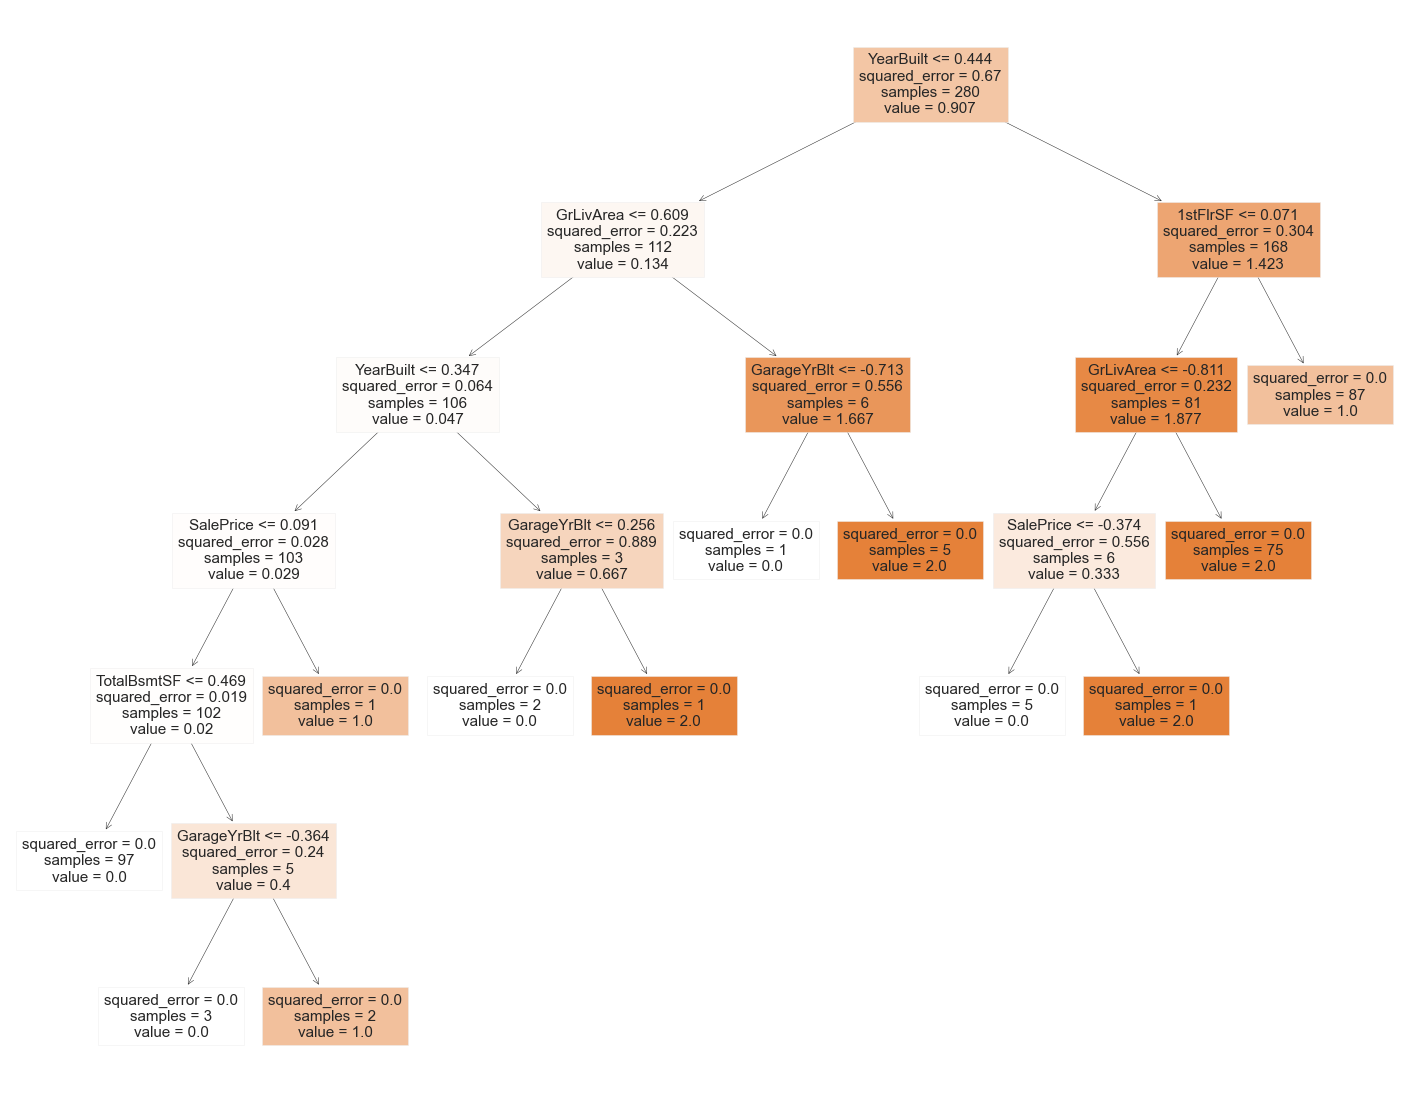

In [23]:
from sklearn import tree

fig = plt.figure(figsize= (25, 20)) #Le indicamos las dimensiones del gráfico

tree.plot_tree(dtReg, feature_names = list(arbolDF.columns), class_names=['0','1','2'], filled=True)
plt.show()

Explicación: Si se analiza el arbol de regresión nos podemos dar cuenta que las variables que determinan el precio(enlistadas en el anterior arbol) van siempre de la mano según que decisión se tome. Esto nos sirve para que la función de costo tenga un menor valor y se acerce más al valor real que en este caso es el precio de venta de una casa.

## 8. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para 
clasificar y predecir, en dependencia de las características de la variable respuesta. 

In [24]:
dat = {
    'y_test': y_test,
    'y_predict_dtc': y_predict_dtr
}

ev = pd.DataFrame(dat, columns=['y_test','y_predict_dtc'])
ev['y_predict_dtc'] = ev['y_predict_dtc'].astype(int)
ev['result'] = np.where(ev['y_test'] == ev['y_predict_dtc'], 1, 0)
ev

,y_test,y_predict_dtc,result
483,2,1,0
1166,1,1,1
1217,1,1,1
847,0,0,1
824,1,1,1
...,...,...,...
204,0,0,1
1288,1,1,1
1444,1,1,1
1095,1,1,1


In [25]:
ev['result'].mean()

0.9468085106382979

Se puede notar que el algoritmo para clasificar tiene un indice de confianza de ~95.7%, lo que lo hace un algoritmo bastante preciso para clasificar y predecir los resultados.

## 9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol 
de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde 
se equivocó menos y la importancia que tienen los errores.

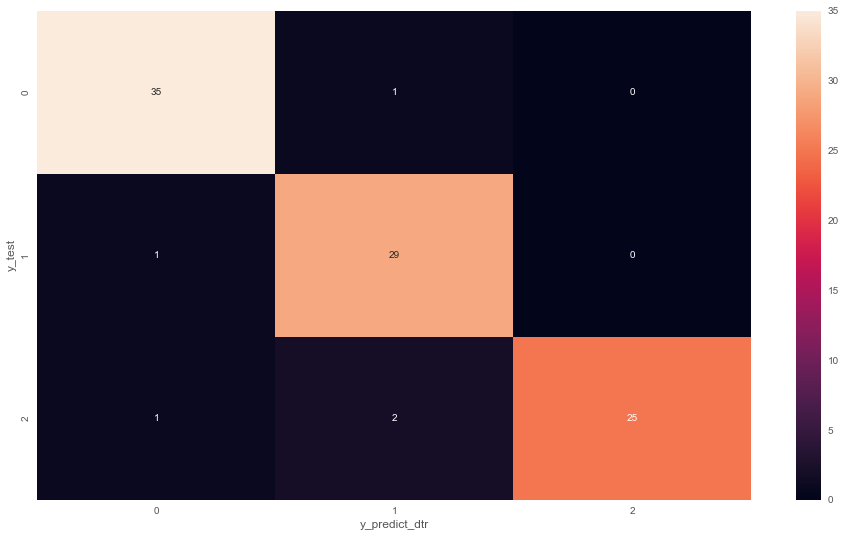

In [26]:
confusion_matrix = pd.crosstab(ev['y_test'], ev['y_predict_dtc'], rownames=['y_test'], colnames=['y_predict_dtr'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

## 10. Analice el desempeño del árbol de regresión.

In [27]:
dat = {
    'y_test': y_test,
    'y_predict_dtr': y_predict_dtr
}

evr = pd.DataFrame(dat, columns=['y_test','y_predict_dtr'])
evr['y_predict_dtr'] = evr['y_predict_dtr'].astype(int)
evr['result'] = np.where(evr['y_test'] == evr['y_predict_dtr'], 1, 0)
evr

,y_test,y_predict_dtr,result
483,2,1,0
1166,1,1,1
1217,1,1,1
847,0,0,1
824,1,1,1
...,...,...,...
204,0,0,1
1288,1,1,1
1444,1,1,1
1095,1,1,1


In [28]:
evr['result'].mean()

0.9468085106382979

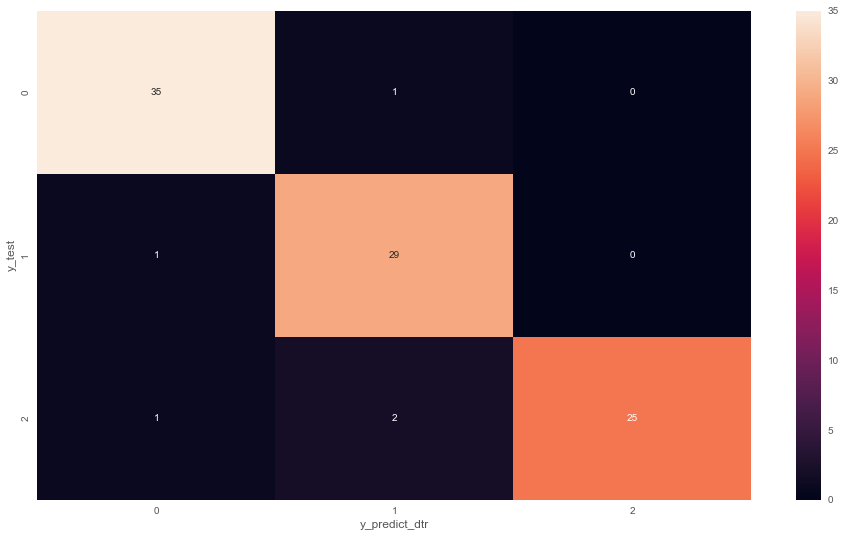

In [29]:
confusion_matrix = pd.crosstab(evr['y_test'], evr['y_predict_dtr'], rownames=['y_test'], colnames=['y_predict_dtr'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

Para el caso delalgoritmo de regresión, también podemos afirmar que es bastante preciso, pues el indice de efectividad está por arriba del 98%, implicando que el margen de error fue mínimo.

## 11. Repita  los  análisis  usando  random  forest  como  algoritmo  de  predicción,  explique  sus resultados comparando ambos algoritmos. 

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2,
       1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2,
       2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0,
       1, 0, 1, 1, 1, 0])

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9680851063829787


In [33]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

evrf = pd.DataFrame(dat, columns=['y_test','y_pred'])
evrf['y_pred'] = evrf['y_pred'].astype(int)
evrf['result'] = np.where(evrf['y_test'] == evrf['y_pred'], 1, 0)
evrf

,y_test,y_pred,result
483,2,1,0
1166,1,1,1
1217,1,1,1
847,0,0,1
824,1,1,1
...,...,...,...
204,0,0,1
1288,1,1,1
1444,1,1,1
1095,1,1,1


In [34]:
evrf['result'].mean()

0.9680851063829787

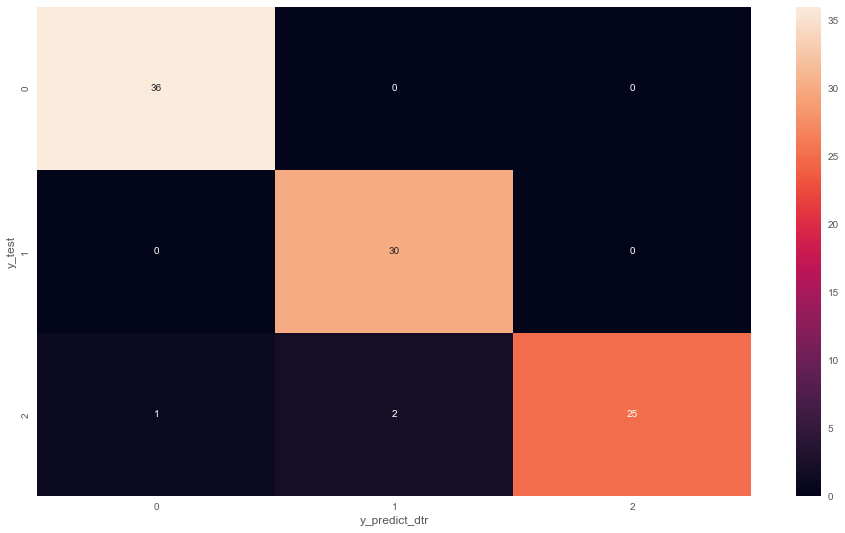

In [35]:
confusion_matrix = pd.crosstab(evrf['y_test'], evrf['y_pred'], rownames=['y_test'], colnames=['y_predict_dtr'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

El caso del random forest se puede calcular que fue mucho más preciso que el resto de algoritmos, aunque la diferencia no es tan significativa, ya que los superaba únicamente por un 3% aproximadamente.La matriz de confusión para el Random Forest es muy similar a los algoritmos anteriores, así que tampoco se aprecia una diferenciación significativa.

## Modelo de regresion lineal

### Variables independientes y variable dependiente

In [36]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "KmeansCluster"]]
y = entrenamiento['SalePrice']

### Test y entrenamiento inicial

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

### Busqueda de variables independientes que aportan mayor informacion (no normalizado)

In [38]:
columns = []
for col in X.columns:
    columns.append(col)

for columna in columns:
    if X[columna].unique().size > 30:
        sale_price = y_train.values.reshape(-1,1)
        sale_price_t = y_test.values.reshape(-1,1)
        year_built = X_train[columna].values.reshape(-1,1)
        year_built_t = X_test[columna].values.reshape(-1,1)
        lm = linear_model.LinearRegression()
        lm.fit(year_built, sale_price)
        salePrice_pred = lm.predict(year_built_t)
        
        print("Nombre de la columna: ",columna)
        print("Mean Squared Error: %.2f"%mean_squared_error(sale_price_t, salePrice_pred))
        print("R squared: %.2f"%r2_score(sale_price_t, salePrice_pred))
        print('\n')

Nombre de la columna:  YearBuilt
Mean Squared Error: 0.18
R squared: 0.50


Nombre de la columna:  YearRemodAdd
Mean Squared Error: 0.26
R squared: 0.28


Nombre de la columna:  TotalBsmtSF
Mean Squared Error: 0.24
R squared: 0.33


Nombre de la columna:  1stFlrSF
Mean Squared Error: 0.26
R squared: 0.26


Nombre de la columna:  GrLivArea
Mean Squared Error: 0.19
R squared: 0.48


Nombre de la columna:  GarageYrBlt
Mean Squared Error: 0.19
R squared: 0.45


Nombre de la columna:  GarageArea
Mean Squared Error: 0.20
R squared: 0.43




### Busqueda de variables independientes que aportan mayor informacion (normalizado)

In [39]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in X.columns:
    X[col] = normalizer(X[col])

print(X)
for columna in columns:
    if X[columna].unique().size > 30:
        sale_price = y_train.values.reshape(-1,1)
        sale_price_t = y_test.values.reshape(-1,1)
        year_built = X_train[columna].values.reshape(-1,1)
        year_built_t = X_test[columna].values.reshape(-1,1)
        lm = linear_model.LinearRegression()
        lm.fit(year_built, sale_price)
        salePrice_pred = lm.predict(year_built_t)
        
        print("Nombre de la columna: ",columna)
        print("Mean Squared Error: %.2f"%mean_squared_error(sale_price_t, salePrice_pred))
        print("R squared: %.2f"%r2_score(sale_price_t, salePrice_pred))
        print('\n')

      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0        0.603197   0.742890      0.658861    -0.781594 -0.970981   0.910152   
2        0.603197   0.662321      0.608345    -0.566737 -0.751029   1.151150   
6        1.474224   0.783174      0.759891     2.004832  1.909009   0.859416   
10      -1.138855  -0.787913     -1.260723    -0.163881 -0.338620  -1.214435   
13       0.603197   0.863743      0.860922     1.360261  1.221661   0.225211   
...           ...        ...           ...          ...       ...        ...   
1447     1.474224   0.420615      0.305253     0.440405  0.279993   2.115142   
1448    -2.009881  -3.003549      0.507315    -1.775308 -1.177185  -0.244101   
1451     1.474224   0.944311      0.961953     1.625475  1.510347   0.491577   
1454     0.603197   0.783174      0.759891     0.443762  0.283430  -0.640479   
1455    -0.267829   0.581753      0.507315    -0.455952 -0.637617   0.710378   

      FullBath  GarageYrBlt  GarageCars

C:\Users\Javier Cotto\AppData\Local\Temp\ipykernel_11232\4169234727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = normalizer(X[col])


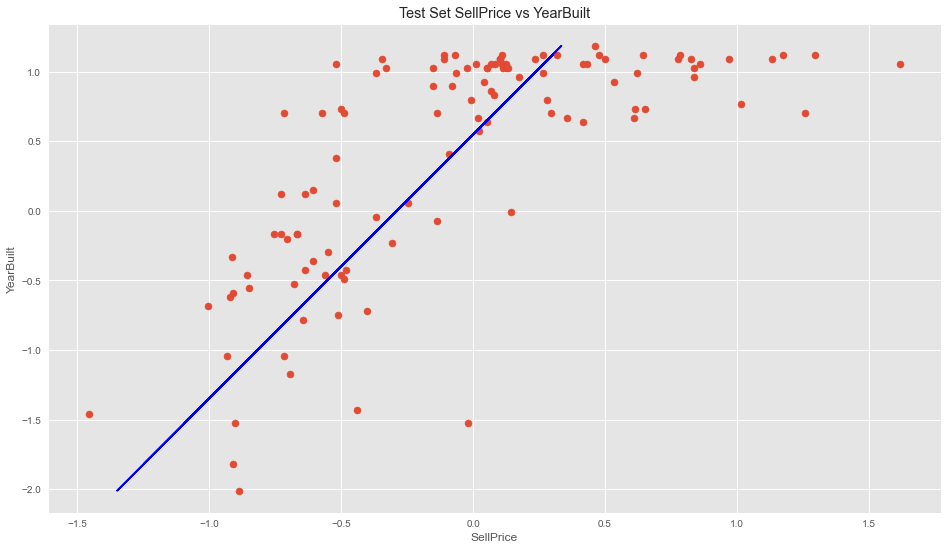

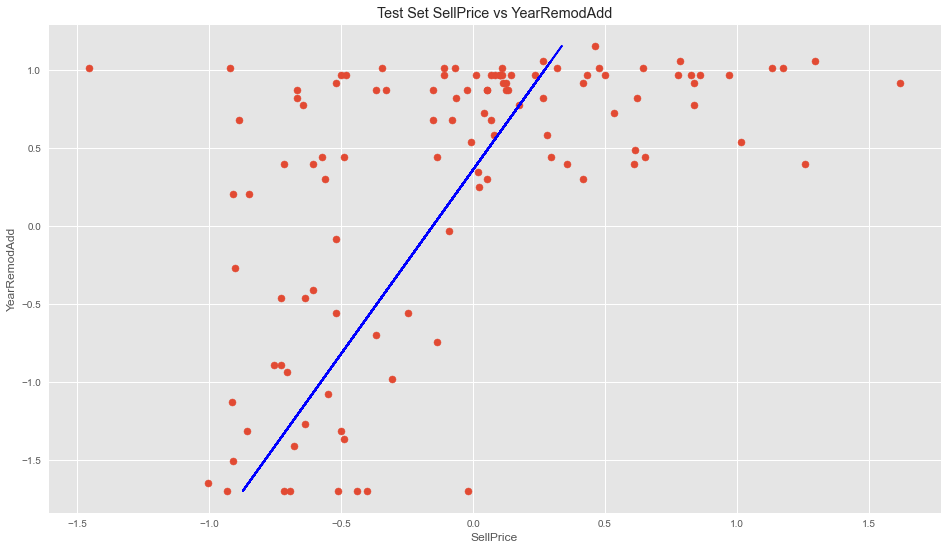

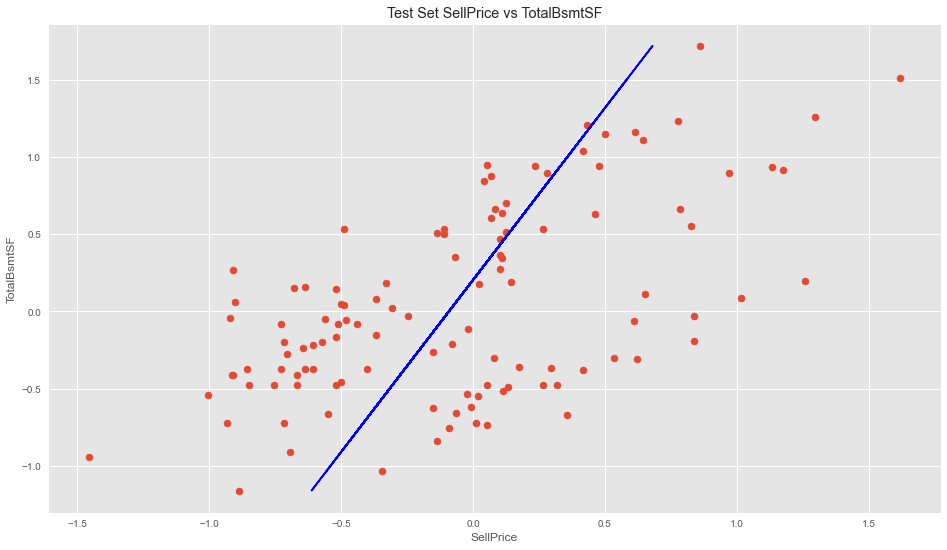

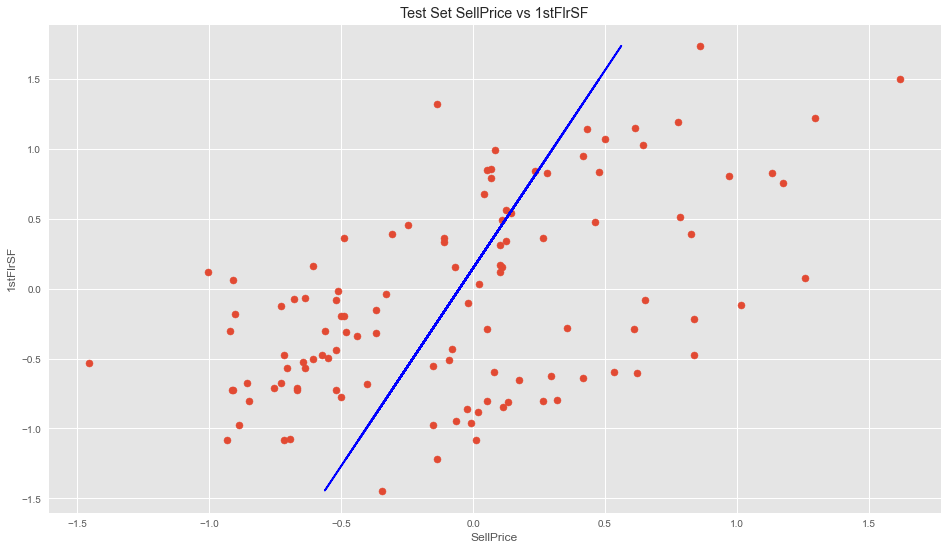

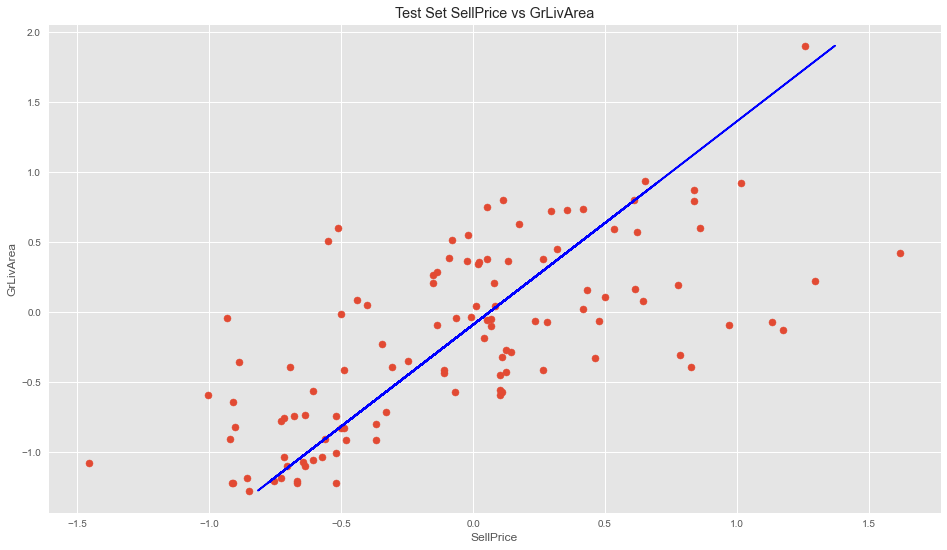

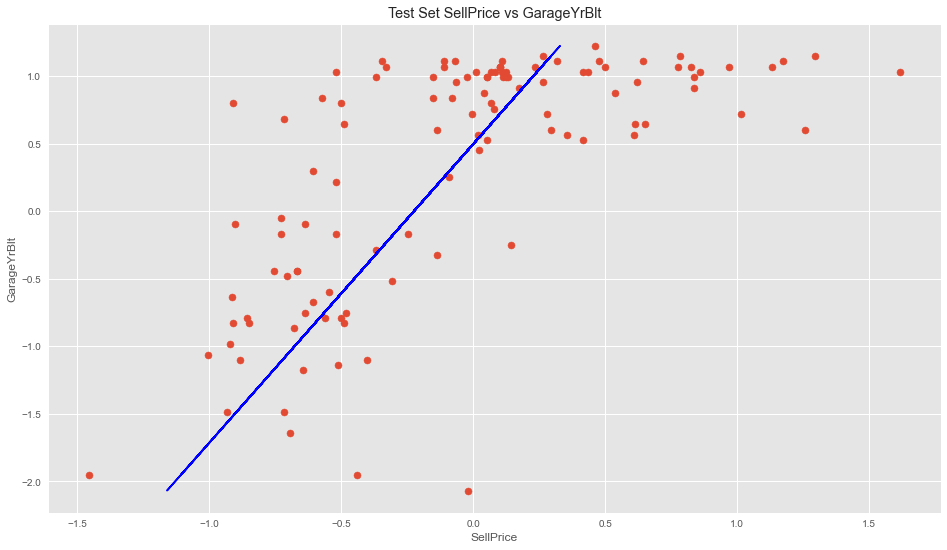

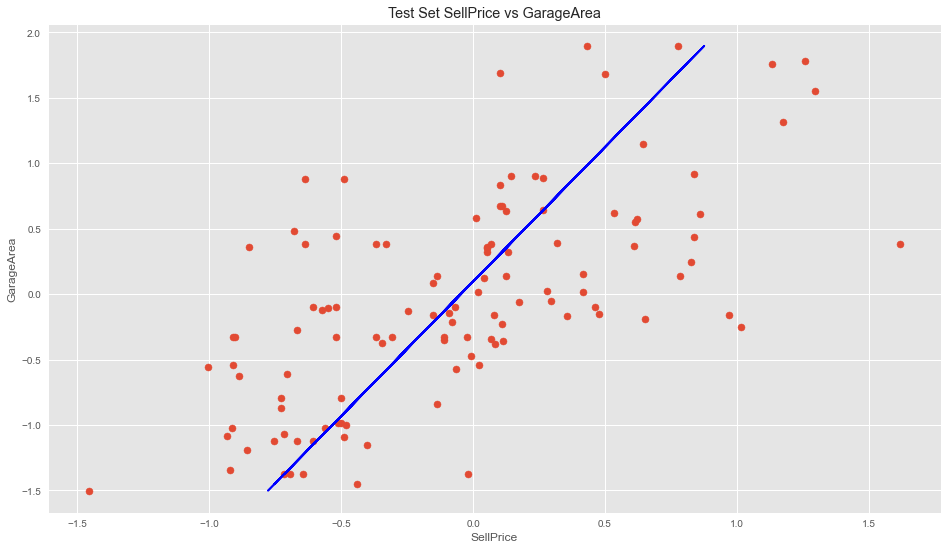

In [40]:
for columna in columns:
    if X[columna].unique().size > 30:
        sale_price = y_train.values.reshape(-1,1)
        sale_price_t = y_test.values.reshape(-1,1)
        year_built = X_train[columna].values.reshape(-1,1)
        year_built_t = X_test[columna].values.reshape(-1,1)
        lm = linear_model.LinearRegression()
        lm.fit(year_built, sale_price)
        salePrice_pred = lm.predict(year_built_t)
        
        fig = plt.figure()
        plt.scatter(sale_price_t,year_built_t)
        plt.plot(salePrice_pred, year_built_t, color="blue")
        plt.xlabel("SellPrice")
        plt.ylabel(columna)
        plt.title("Test Set SellPrice vs "+ columna)
        print("\n")

La mayoría de variables independientes proveen visualmente una fuerte relacion lineal con la variable dependiente. Sin embargo, tanto los valores de no normalizados como normalizados proveen valores de R² no tan buenos. Por lo tanto, se debe hacer una <i>feature selection</i> para poder mejorar el modelo a nivel de multiples variables.

### Correlacion de variables para descartar variables independientes con alta correlacion

<AxesSubplot:>

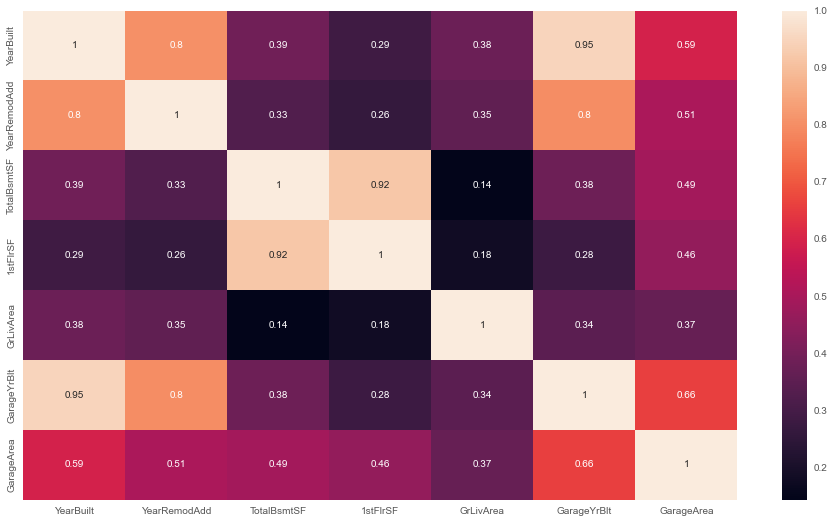

In [41]:
Cor_DI = entrenamiento[["YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageYrBlt", "GarageArea"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

Se puede ver que existe una alta relacion entre las variables: <br>

TotalBsmtSF-1stFlrSF     (0.92)<br>
GarageArea-YearBuilt     (0.59)<br>
YearRemodAdd-YearBuilt  (0.8)<br>
GarageYrBlt-YearRemodAdd (0.8)<br>
GarageYrBlt-YearBuilt    (0.95)<br>
GarageYrBlt-GarageArea   (0.66)<br>

Así que se excluyen las variables independientes GarageYrBlt, YearRemodAdd, GarageArea y 1stFlrSF.

<AxesSubplot:>

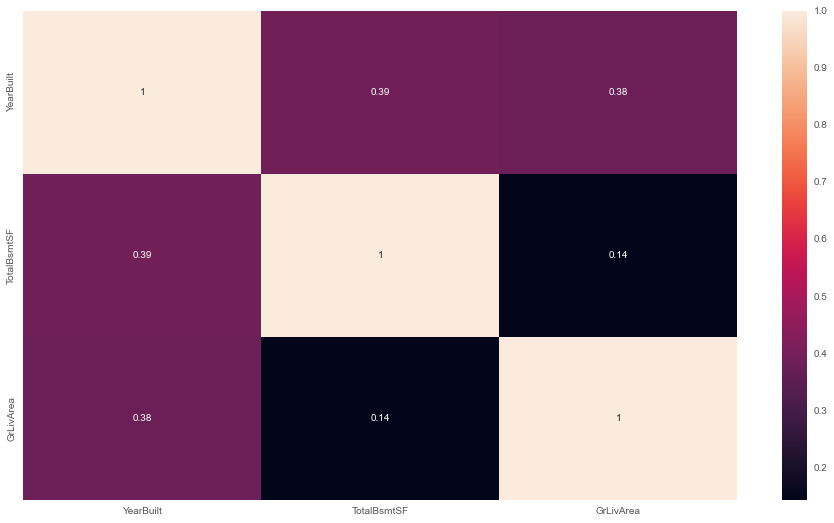

In [42]:
Cor_DI = entrenamiento[["YearBuilt", "TotalBsmtSF", "GrLivArea"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

### Correlacion de las variables independientes restantes frente a la variable dependiente para descartar variables independientes con baja correlacion

<AxesSubplot:>

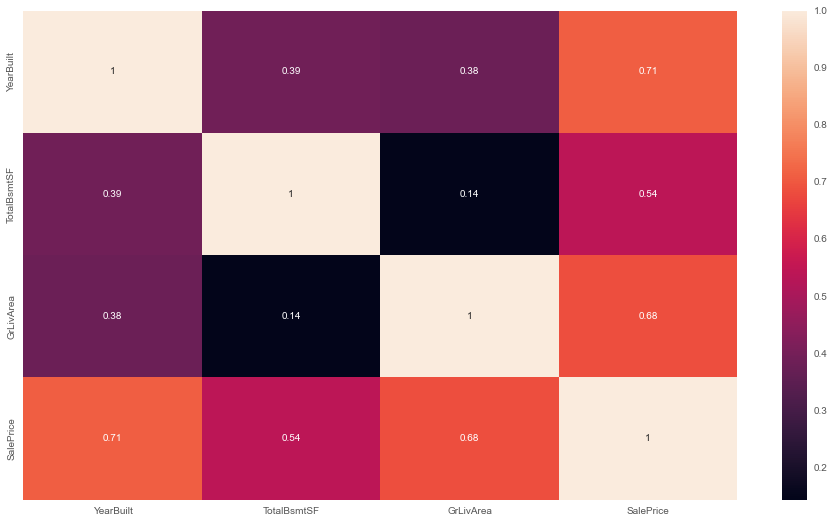

In [43]:
Cor_DI = entrenamiento[["YearBuilt", "TotalBsmtSF", "GrLivArea", "SalePrice"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

Se puede ver que a pesar de eliminar varias variables independientes, el resto de variables tienen una correlacion >0.5 con la variable dependiente (SalePrice), asi que no hay mas variables que eliminar.

### Dividir la informacion

In [44]:
X = entrenamiento[["YearBuilt", "TotalBsmtSF", "GrLivArea"]]
y = entrenamiento['SalePrice']

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

### Modelo de Regresion Lineal Multiple

In [45]:
# creating an object of LinearRegression class
LR = linear_model.LinearRegression()
# fitting the training data
LR.fit(X_train, y_train)

LinearRegression()

### Prediccion

In [46]:
y_prediction = LR.predict(X_test)
y_prediction

array([-0.90934666,  0.14018545,  0.81701391,  0.25008982, -1.07113921,
       -0.73056502,  0.13271251,  0.11905671,  0.08240598,  0.39102555,
       -0.12039223, -0.16910933, -0.38444884,  0.64783239,  0.06430478,
        0.02252569,  0.29758409,  0.35873535,  0.15740801,  0.47895126,
        0.65284088, -0.43087967, -0.51109668, -0.58899573,  0.1521636 ,
       -0.01031137,  0.25694208,  0.43001206,  0.36992804, -0.92835289,
        0.85397787, -0.42818114,  0.10555138,  0.66773816, -0.277669  ,
        0.79122348,  0.72837132, -0.11531075,  0.08862365, -0.17986668,
       -0.53223887,  0.35870003,  0.03835244,  0.116115  , -0.44736555,
       -0.59512585, -0.79941756,  0.3602126 ,  0.52426616, -1.33845739,
        0.54418691,  0.30567653,  0.24697772,  0.30532927, -1.08866964,
       -0.82509016,  0.61691287, -0.85374079, -0.54096769, -0.29922072,
        0.15468629, -0.6118801 , -1.32314635, -0.87522009,  0.4282987 ,
        0.05877102, -0.66903048,  0.0193145 ,  0.17475122,  0.10

### Puntaje de R²

In [47]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("Mean Squared Error: %.2f"%mean_squared_error(y_test,y_prediction))
print("R squared: %.2f"%r2_score(y_test,y_prediction))
print("Se puede ver que se obtuvo un puntaje R²: %.2f"%r2_score(y_test,y_prediction),"indicando que el modelo si es bueno para realizar predicciones.")

Mean Squared Error: 0.09
R squared: 0.77
Se puede ver que se obtuvo un puntaje R²: 0.77 indicando que el modelo si es bueno para realizar predicciones.


### Realmente existe Overfitting?

La respuesta a esta pregunta es; No, en realidad no existe Overfitting. Pues como se pudieron observar en las gráficas de disperción, la mayoria esta ajustada a tener una tendencia lineal con una variabilidad en la precisión de cada dato. Unos muy precisos y exactos, otros se encuentran cerca de la linea y otros alejados(no tanto para ser considerados datos atipicos).

### Analisis de Residuos

In [48]:
# Residual Standard Error of the model

meanSqErr = metrics.mean_squared_error(y_test, y_prediction)
num_data = X.shape[0]
rse = math.sqrt(meanSqErr/(num_data-2))
print('RSE=',rse)


RSE= 0.015223314987281461


Como podemos ver, nuestro modelo de regresión lineal, se ajusta bastante precisamente a nuestro conjunto de datos, con un 1.3% de error residual.

### 5. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para predecir el precio de las casas. 

In [49]:
dat = {
    'y_test': y_test,
    'y_prediction': y_prediction
}

ev = pd.DataFrame(dat, columns=['y_test','y_prediction'])
ev['result'] = (ev['y_test'] - ev['y_prediction']).abs()
ev

,y_test,y_prediction,result
1314,-0.801287,-0.909347,0.108060
1099,-0.343451,0.140185,0.483637
255,0.536076,0.817014,0.280938
1201,0.149325,0.250090,0.100765
1034,-0.792251,-1.071139,0.278888
...,...,...,...
572,0.469810,0.257815,0.211995
0,0.277037,0.224819,0.052218
1217,0.529522,0.174284,0.355238
964,0.354146,0.367798,0.013651


In [50]:
ev['result'].mean() / 2

0.10756078118127435

In [51]:
ev['result'].std()

0.20072371285220278

R// Se puede notar que el algoritmo para predecir el precio de las casas es bastante eficiente, pues la media del rango de precisión de los resultados es del 9% con una desviación estándar de 0.15, por lo que las predicciones son congruentes y el margen de error mínimo. 

### 6. Discuta sobre la efectividad del modelo. Haga los gráficos que crea que le pueden ayudar en la discusión.

<AxesSubplot:ylabel='Frequency'>

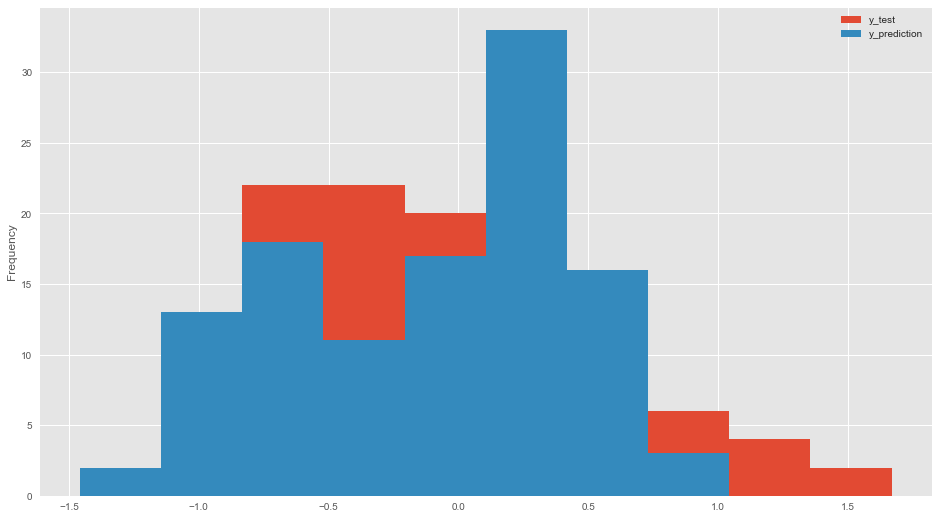

In [52]:
pd.DataFrame(dat, columns=['y_test','y_prediction']).sort_values('y_prediction').plot.hist()

In [53]:
correlation = pd.DataFrame(dat, columns=['y_test','y_prediction']).sort_values('y_prediction').corr()
correlation

,y_test,y_prediction
y_test,1.000000,0.878208
y_prediction,0.878208,1.000000


<AxesSubplot:>

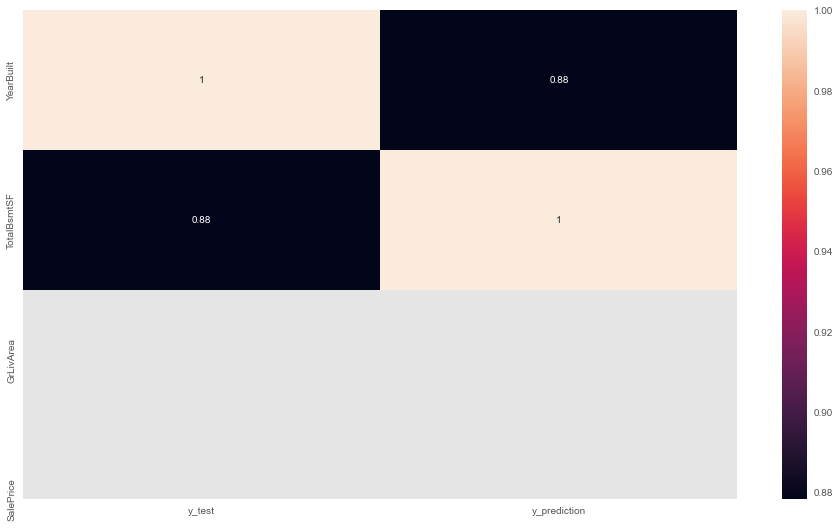

In [54]:
fig, axis = plt.subplots()
sb.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

R// Se puede observar según la gráfica que el modelo es bastante efectivo, pues la correlación entre los datos de prueba y las predicciones son valores por encima del 90%, además que como se puede observar en la primera gráfica las frecuencias se encuentran distribuidas de igual forma, implicando coherencia en las predicciones.

### 7. Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el de regresión). 
### ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

Comparando la predicciones, el arbol de decisión es más preciso debido a que este cuenta con un espacio de media muestral mucho mayor. Cabe resaltar que la precisión en la  mineria de datos es todo.

La regresión lineal utiliza menos recursos del sistema.

Los arboles de decision funcionan analizando todo el conjunto, mientras que el modelo de regresión lineal analiza 1 por 1, por lo tanto los arboles de decisión demoran menor tiempo.

Extraido de: http://scielo.sld.cu/pdf/rcci/v9n4/rcci08415.pdf

## Modelo de bayes ingenuo (naive bayes)

In [55]:
gaussian = GaussianNB()
X = entrenamiento[["YearBuilt", "TotalBsmtSF", "GrLivArea"]]
y = entrenamiento.pop('KmeansCluster')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 448 to 1189
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearBuilt    261 non-null    float64
 1   TotalBsmtSF  261 non-null    float64
 2   GrLivArea    261 non-null    float64
dtypes: float64(3)
memory usage: 8.2 KB


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 1455
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearBuilt    374 non-null    float64
 1   TotalBsmtSF  374 non-null    float64
 2   GrLivArea    374 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [58]:
gaussian.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred = gaussian.predict(X_test)
cm = Confusion_Matrix(y_test,y_pred)

In [60]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)

Confusion matrix for Naive Bayes
 [[37  0  0]
 [ 1 39  1]
 [ 4  4 27]]
Accuracy:  0.911504424778761


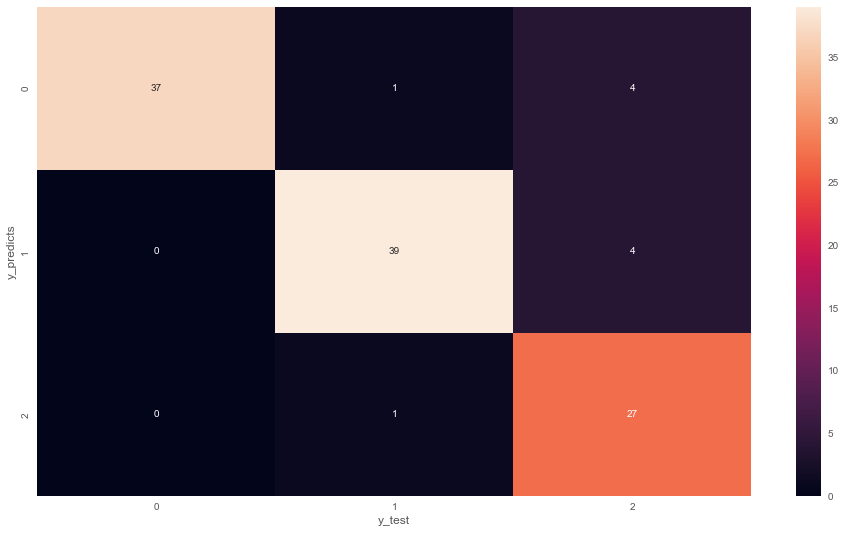

La longitud de nuestro modelos es de :  113


In [70]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['y_predicts'], colnames=['y_test'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()
print("La longitud de nuestro modelos es de : ", len(y_test))

Por lo que podemos ver, nuestro modelo respecto a la matriz de confusión, predice un total de 103 datos exitos(que se pueden ver en la diagonal principal). El resto de cuadros muestra que existen 10 datos que no se pudieron predecir de forma correcta.

#### YearBuilt
TP = 37
FP = 5
TN = 39 + 4 + 1 + 27 = 71
FN = 0

#### TotalBsmtSF
TP = 39
FP = 4
TN = 37 + 4 + 0 + 27 = 68
FN = 2

#### GrLivArea
TP = 27
FP = 1
TN = 37 + 39 + 1 + 0 = 77
FN = 8

Podemos concluir que donde se confundio menos al predecir, fue en los campos GrLivArea y TotalBsmtSF. Mientras que en YearBuilt tuvo una precisión de 100%.

Extraido de: https://datapeaker.com/big-data/api-de-pnl-api-de-pnl-de-google-para-analizar-y-producir-mejor-contenido/

### Existe Overfitting?

<AxesSubplot:>

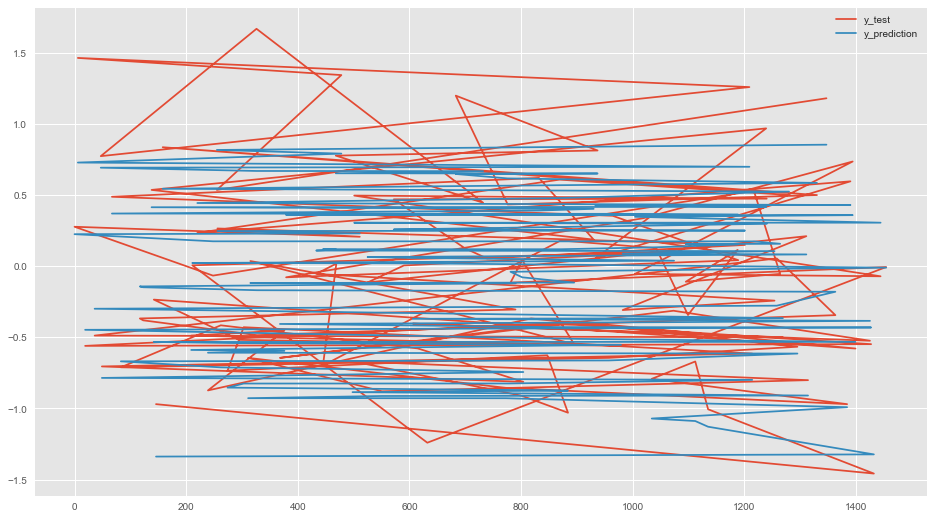

In [84]:
pd.DataFrame(dat, columns=['y_test','y_prediction']).sort_values('y_prediction').plot()

Si observamos la grafica, la mayorida de datos predecidos se encuentran en el centro de los datos de prueba, sin una precisión a tal punto de ser iguales, por lo que 